In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [2]:
#membaca File CSV
df = pd.read_csv("dataset-raw.csv")

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Menghapus kolom kurikulum karena yang ingin kita lihat dari faktor externalnya

In [3]:
#Deleting coloumn
df = df.drop(["Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)", 
              "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
              "Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)",'Curricular units 2nd sem (evaluations)',
              'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)'], axis=1).copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marital status              4424 non-null   int64  
 1   Application mode            4424 non-null   int64  
 2   Application order           4424 non-null   int64  
 3   Course                      4424 non-null   int64  
 4   Daytime/evening attendance  4424 non-null   int64  
 5   Previous qualification      4424 non-null   int64  
 6   Nacionality                 4424 non-null   int64  
 7   Mother's qualification      4424 non-null   int64  
 8   Father's qualification      4424 non-null   int64  
 9   Mother's occupation         4424 non-null   int64  
 10  Father's occupation         4424 non-null   int64  
 11  Displaced                   4424 non-null   int64  
 12  Educational special needs   4424 non-null   int64  
 13  Debtor                      4424 

Decode All Column

In [4]:
#melihat Info dari data frame yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marital status              4424 non-null   int64  
 1   Application mode            4424 non-null   int64  
 2   Application order           4424 non-null   int64  
 3   Course                      4424 non-null   int64  
 4   Daytime/evening attendance  4424 non-null   int64  
 5   Previous qualification      4424 non-null   int64  
 6   Nacionality                 4424 non-null   int64  
 7   Mother's qualification      4424 non-null   int64  
 8   Father's qualification      4424 non-null   int64  
 9   Mother's occupation         4424 non-null   int64  
 10  Father's occupation         4424 non-null   int64  
 11  Displaced                   4424 non-null   int64  
 12  Educational special needs   4424 non-null   int64  
 13  Debtor                      4424 

In [5]:
#decode all the categorical column

#converts Marital Status
df_marital = df.copy()
mapping_maritalStatus = {1 : 'Single', 2 : 'Married', 3: 'Widowed', 4 : 'Divorced', 5 : 'Common-law Marriage', 6 : 'Legally Seperated'}
df_marital['Marital status'] = df_marital['Marital status'].replace(mapping_maritalStatus)

df_marital

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,8,5,2,1,1,1,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,6,1,11,1,1,1,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1,5,5,1,1,1,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,8,2,15,1,1,1,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,12,1,3,0,1,1,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1,6,15,1,1,1,1,1,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1,2,15,1,1,19,1,1,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1,1,12,1,1,1,22,27,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1,1,9,1,1,1,22,27,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [6]:
#converts Application Mode

df_application = df_marital.copy()
mapping_ApplicationMode = {
    1: "1st phase—general contingent",
    2: "Ordinance No. 612/93",
    3: "1st phase—special contingent (Azores Island)",
    4: "Holders of other higher courses",
    5: "Ordinance No. 854-B/99",
    6: "International student (bachelor)",
    7: "1st phase—special contingent (Madeira Island)",
    8: "2nd phase—general contingent",
    9: "3rd phase—general contingent",
    10: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    11: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    12: "Over 23 years old",
    13: "Transfer",
    14: "Change in course",
    15: "Technological specialization diploma holders",
    16: "Change in institution/course",
    17: "Short cycle diploma holders",
    18: "Change in institution/course (International)"
}
df_application['Application mode'] = df_application['Application mode'].replace(mapping_ApplicationMode)
df_application

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,2,1,1,1,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,11,1,1,1,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,5,1,1,1,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,15,1,1,1,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,3,0,1,1,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,15,1,1,1,1,1,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,15,1,1,19,1,1,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,12,1,1,1,22,27,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,9,1,1,1,22,27,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [7]:
#converts course 
df_course = df_application.copy()

mapping_course = {
    1: "Biofuel Production Technologies",
    2: "Animation and Multimedia Design",
    3: "Social Service (evening attendance)",
    4: "Agronomy",
    5: "Communication Design",
    6: "Veterinary Nursing",
    7: "Informatics Engineering",
    8: "Equiniculture",
    9: "Management",
    10: "Social Service",
    11: "Tourism",
    12: "Nursing",
    13: "Oral Hygiene",
    14: "Advertising and Marketing Management",
    15: "Journalism and Communication",
    16: "Basic Education",
    17: "Management (evening attendance)"
}
df_course['Course'] = df_course["Course"].replace(mapping_course)

df_course


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,1,1,1,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,1,1,1,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,1,1,1,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,1,1,1,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),0,1,1,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,1,1,1,1,1,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,1,1,19,1,1,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,1,1,1,22,27,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,1,1,1,22,27,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [8]:
#converts attandance
df_attandance = df_course.copy()

mapping_attandance = {
    1 : 'Daytime',
    0 : 'Evening'
}
df_attandance['Daytime/evening attendance'] = df_attandance["Daytime/evening attendance"].replace(mapping_attandance)

df_attandance

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,1,1,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,1,1,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,1,1,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,1,1,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,1,1,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,1,1,1,1,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,1,19,1,1,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,1,1,22,27,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,1,1,22,27,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [9]:
#converts Previous Qualification
df_prevQual = df_attandance.copy()

mapping_prevQual = {
    1: "Secondary education",
    2: "Higher education—bachelor’s degree",
    3: "Higher education—degree",
    4: "Higher education—master’s degree",
    5: "Higher education—doctorate",
    6: "Frequency of higher education",
    7: "12th year of schooling—not completed",
    8: "11th year of schooling—not completed",
    9: "Other—11th year of schooling",
    10: "10th year of schooling",
    11: "10th year of schooling—not completed",
    12: "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    13: "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    14: "Technological specialization course",
    15: "Higher education—degree (1st cycle)",
    16: "Professional higher technical course",
    17: "Higher education—master’s degree (2nd cycle)"
}
df_prevQual['Previous qualification'] = df_prevQual["Previous qualification"].replace(mapping_prevQual)

df_prevQual

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,1,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,1,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,1,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,1,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,1,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,1,1,1,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,19,1,1,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,1,22,27,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,1,22,27,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [10]:
#converts Nationality 

df_nationality = df_prevQual.copy()

mapping_nationality = {
    1: "Portuguese",
    2: "German",
    3: "Spanish",
    4: "Italian",
    5: "Dutch",
    6: "English",
    7: "Lithuanian",
    8: "Angolan",
    9: "Cape Verdean",
    10: "Guinean",
    11: "Mozambican",
    12: "Santomean",
    13: "Turkish",
    14: "Brazilian",
    15: "Romanian",
    16: "Moldova (Republic of)",
    17: "Mexican",
    18: "Ukrainian",
    19: "Russian",
    20: "Cuban",
    21: "Colombian"
}
df_nationality['Nacionality'] = df_nationality["Nacionality"].replace(mapping_nationality)

df_nationality

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,13,10,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,1,3,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,22,27,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,23,27,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,22,28,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,1,1,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,1,1,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,22,27,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,22,27,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [11]:
#converts Parents Qualification

df_parQual = df_nationality.copy()

mapping_parQual = {
    1: "Secondary Education—12th Year of Schooling or Equivalent",
    2: "Higher Education—bachelor’s degree",
    3: "Higher Education—degree",
    4: "Higher Education—master’s degree",
    5: "Higher Education—doctorate",
    6: "Frequency of Higher Education",
    7: "12th Year of Schooling—not completed",
    8: "11th Year of Schooling—not completed",
    9: "7th Year (Old)",
    10: "Other—11th Year of Schooling",
    11: "2nd year complementary high school course",
    12: "10th Year of Schooling",
    13: "General commerce course",
    14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",
    15: "Complementary High School Course",
    16: "Technical-professional course",
    17: "Complementary High School Course—not concluded",
    18: "7th year of schooling",
    19: "2nd cycle of the general high school course",
    20: "9th Year of Schooling—not completed",
    21: "8th year of schooling",
    22: "General Course of Administration and Commerce",
    23: "Supplementary Accounting and Administration",
    24: "Unknown",
    25: "Cannot read or write",
    26: "Can read without having a 4th year of schooling",
    27: "Basic education 1st cycle (4th/5th year) or equivalent",
    28: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent",
    29: "Technological specialization course",
    30: "Higher education—degree (1st cycle)",
    31: "Specialized higher studies course",
    32: "Professional higher technical course",
    33: "Higher Education—master’s degree (2nd cycle)",
    34: "Higher Education—doctorate (3rd cycle)"
}
df_parQual["Mother's qualification"] = df_parQual["Mother's qualification"].replace(mapping_parQual)
df_parQual["Father's qualification"] = df_parQual["Father's qualification"].replace(mapping_parQual)


df_parQual

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year of Schooling,6,...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,4,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,10,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,6,...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,10,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,6,...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,10,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,10,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,8,...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [12]:
#converts Parents occupation

df_occupation = df_parQual.copy()

mapping_occupation = {
    1: "Student",
    2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    3: "Specialists in Intellectual and Scientific Activities",
    4: "Intermediate Level Technicians and Professions",
    5: "Administrative staff",
    6: "Personal Services, Security and Safety Workers, and Sellers",
    7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    8: "Skilled Workers in Industry, Construction, and Craftsmen",
    9: "Installation and Machine Operators and Assembly Workers",
    10: "Unskilled Workers",
    11: "Armed Forces Professions",
    12: "Other Situation; 13—(blank)",
    13: "Armed Forces Officers",
    14: "Armed Forces Sergeants",
    15: "Other Armed Forces personnel",
    16: "Directors of administrative and commercial services",
    17: "Hotel, catering, trade, and other services directors",
    18: "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    19: "Health professionals",
    20: "Teachers",
    21: "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    22: "Intermediate level science and engineering technicians and professions",
    23: "Technicians and professionals of intermediate level of health",
    24: "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    25: "Information and communication technology technicians",
    26: "Office workers, secretaries in general, and data processing operators",
    27: "Data, accounting, statistical, financial services, and registry-related operators",
    28: "Other administrative support staff",
    29: "Personal service workers",
    30: "Sellers",
    31: "Personal care workers and the like",
    32: "Protection and security services personnel",
    33: "Market-oriented farmers and skilled agricultural and animal production workers",
    34: "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    35: "Skilled construction workers and the like, except electricians",
    36: "Skilled workers in metallurgy, metalworking, and similar",
    37: "Skilled workers in electricity and electronics",
    38: "Workers in food processing, woodworking, and clothing and other industries and crafts",
    39: "Fixed plant and machine operators",
    40: "Assembly workers",
    41: "Vehicle drivers and mobile equipment operators",
    42: "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    43: "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    44: "Meal preparation assistants",
    45: "Street vendors (except food) and street service provider",
    46: "Unemployed"
}
df_occupation["Mother's occupation"] = df_occupation["Mother's occupation"].replace(mapping_occupation)
df_occupation["Father's occupation"] = df_occupation["Father's occupation"].replace(mapping_occupation)


df_occupation

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,Intermediate Level Technicians and Professions,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",...,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,Unskilled Workers,...,1,0,0,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",...,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate


In [13]:
#converts Gender

df_Gender = df_occupation.copy()

mapping_Gender = {
    0 : 'Female',
    1: 'Male'
}
df_Gender["Gender"] = df_Gender["Gender"].replace(mapping_Gender)
df_Gender["Gender"] = df_Gender["Gender"].replace(mapping_Gender)


df_Gender

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,1,Male,0,20,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,Intermediate Level Technicians and Professions,...,0,0,Male,0,19,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,0,Male,0,19,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,0,1,Female,0,20,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,1,Female,0,45,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",...,0,1,Male,0,19,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,Unskilled Workers,...,1,0,Female,0,18,1,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,1,Female,1,30,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",...,0,1,Female,1,20,0,9.4,-0.8,-3.12,Graduate


In [14]:
#converts all Yes Or No Column

df_YesNo = df_Gender.copy()

mapping_YesNo = {
    0 : 'No',
    1: 'Yes'
}
df_YesNo["Displaced"] = df_YesNo["Displaced"].replace(mapping_YesNo)
df_YesNo["Educational special needs"] = df_YesNo["Educational special needs"].replace(mapping_YesNo)
df_YesNo["Debtor"] = df_YesNo["Debtor"].replace(mapping_YesNo)
df_YesNo["Tuition fees up to date"] = df_YesNo["Tuition fees up to date"].replace(mapping_YesNo)
df_YesNo["Scholarship holder"] = df_YesNo["Scholarship holder"].replace(mapping_YesNo)
df_YesNo["International"] = df_YesNo["International"].replace(mapping_YesNo)

df_YesNo

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,No,Yes,Male,No,20,No,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,Intermediate Level Technicians and Professions,...,No,No,Male,No,19,No,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,No,No,Male,No,19,No,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,No,Yes,Female,No,20,No,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,No,Yes,Female,No,45,No,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",...,No,Yes,Male,No,19,No,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,Unskilled Workers,...,Yes,No,Female,No,18,Yes,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,No,Yes,Female,Yes,30,No,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",...,No,Yes,Female,Yes,20,No,9.4,-0.8,-3.12,Graduate


In [15]:
#Check the info of the data frame

df_final = df_YesNo.copy()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marital status              4424 non-null   object 
 1   Application mode            4424 non-null   object 
 2   Application order           4424 non-null   int64  
 3   Course                      4424 non-null   object 
 4   Daytime/evening attendance  4424 non-null   object 
 5   Previous qualification      4424 non-null   object 
 6   Nacionality                 4424 non-null   object 
 7   Mother's qualification      4424 non-null   object 
 8   Father's qualification      4424 non-null   object 
 9   Mother's occupation         4424 non-null   object 
 10  Father's occupation         4424 non-null   object 
 11  Displaced                   4424 non-null   object 
 12  Educational special needs   4424 non-null   object 
 13  Debtor                      4424 

In [16]:
#rewrite df_final back to df

df = df_final.copy()
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,No,Yes,Male,No,20,No,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,Intermediate Level Technicians and Professions,...,No,No,Male,No,19,No,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,No,No,Male,No,19,No,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,No,Yes,Female,No,20,No,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,No,Yes,Female,No,45,No,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",...,No,Yes,Male,No,19,No,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education—12th Year of Schooling or ...,Secondary Education—12th Year of Schooling or ...,Unskilled Workers,...,Yes,No,Female,No,18,Yes,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,No,Yes,Female,Yes,30,No,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",...,No,Yes,Female,Yes,20,No,9.4,-0.8,-3.12,Graduate


Data Visualization

C:\Users\Xov\AppData\Local\Temp\ipykernel_944\1120988710.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_RetentionStatus, x ="Retention Status", y = "Number of Students", palette = 'magma')


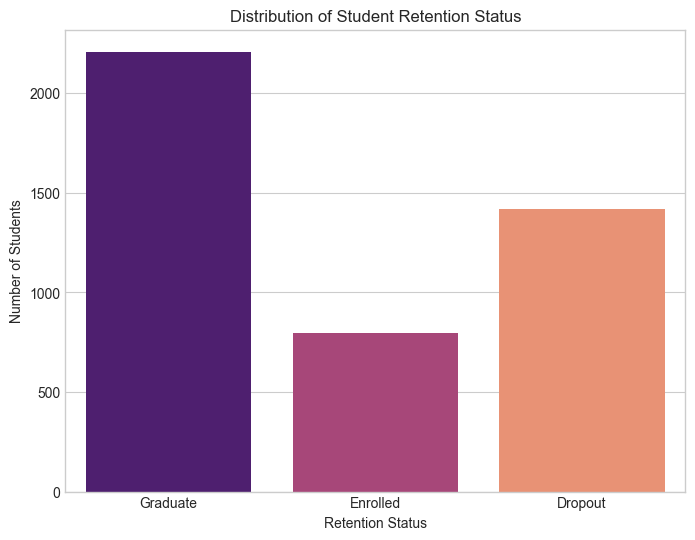

In [17]:
#total each target

graduate = df[(df['Target'] == 'Graduate')].iloc[:, 22].count()
enrolled = df[(df['Target'] == 'Enrolled')].iloc[:, 22].count()
dropout = df[(df['Target'] == 'Dropout')].iloc[:, 22].count()

value = [graduate, enrolled, dropout]
category = ['Graduate', 'Enrolled', 'Dropout']

plt.style.use('seaborn-v0_8-whitegrid')

df_RetentionStatus = pd.DataFrame({"Retention Status" : category, "Number of Students" : value})

plt.figure(figsize=(8, 6))
sns.barplot(data = df_RetentionStatus, x ="Retention Status", y = "Number of Students", palette = 'magma')
plt.title('Distribution of Student Retention Status')
plt.xticks(rotation=0)
plt.show()

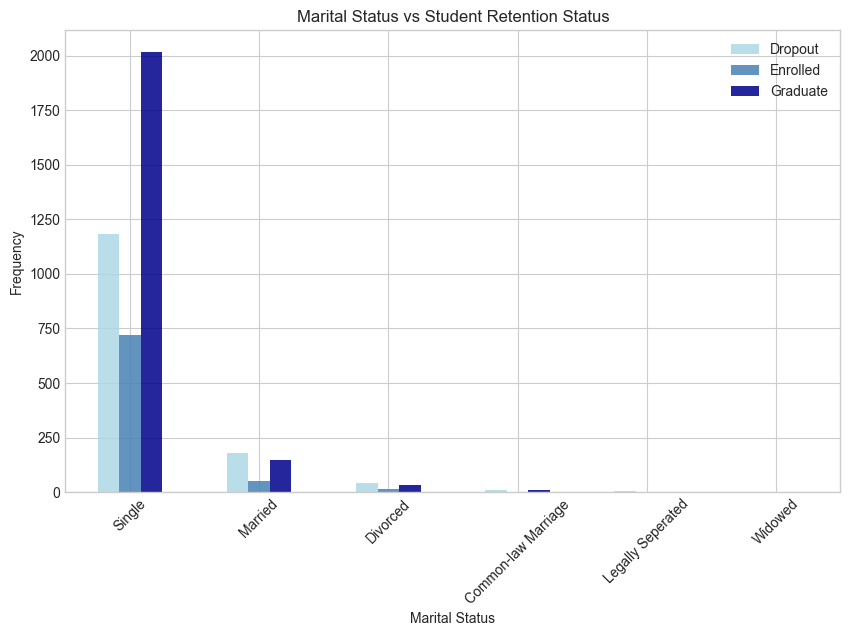

In [18]:
#Marital Status vs Student Retention Status

df_maritalStatus = pd.crosstab(df['Marital status'], df['Target'])
df_maritalStatus['Total'] = df_maritalStatus.sum(axis =1)
df_maritalStatus = df_maritalStatus.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_maritalStatus.plot(kind='bar', figsize=(10, 6), cmap=custom_cmap, alpha = 0.85)
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title('Marital Status vs Student Retention Status')
plt.legend()
plt.xticks(rotation=45)
plt.show()

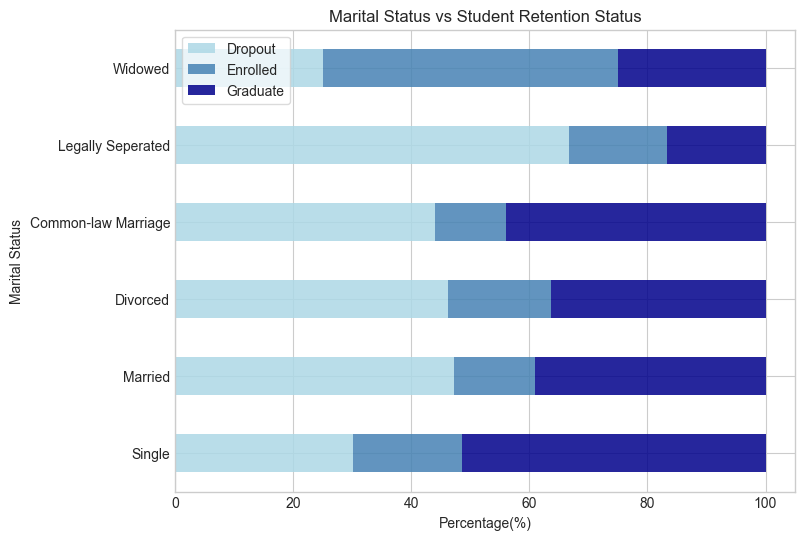

In [19]:
#Marital Status vs Student Retention Status (percentage)

df_maritalStatus = pd.crosstab(df['Marital status'], df['Target'])
df_maritalStatus_percentage = df_maritalStatus.div(df_maritalStatus.sum(axis=1), axis=0) * 100
df_maritalStatus_percentage['Total'] = df_maritalStatus.sum(axis =1)
df_maritalStatus_percentage = df_maritalStatus_percentage.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_maritalStatus_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Marital Status")
plt.title('Marital Status vs Student Retention Status')
plt.legend(loc='upper left', framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

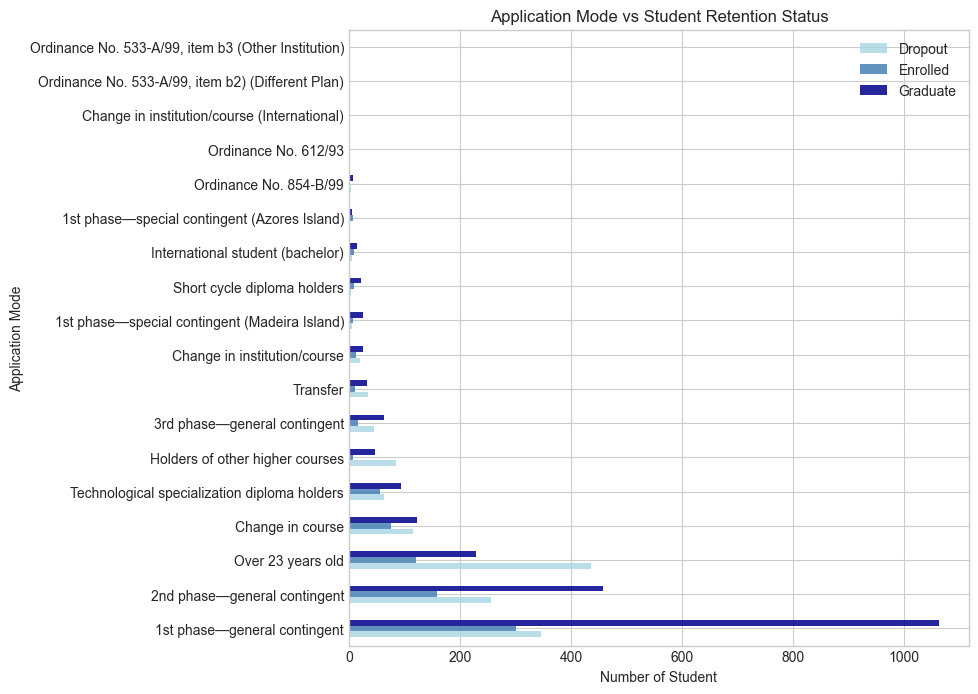

In [20]:
#Application Mode vs Student Retention Status

df_applicationMode = pd.crosstab(df['Application mode'], df['Target'])
df_applicationMode['Total'] = df_applicationMode.sum(axis =1)
df_applicationMode = df_applicationMode.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_applicationMode.plot(kind='barh', figsize=(8, 8), cmap=custom_cmap, alpha = 0.85)
plt.title('Application Mode vs Student Retention Status')
plt.xlabel("Number of Student")
plt.ylabel("Application Mode")
plt.legend()
plt.xticks(rotation=0)
plt.show()

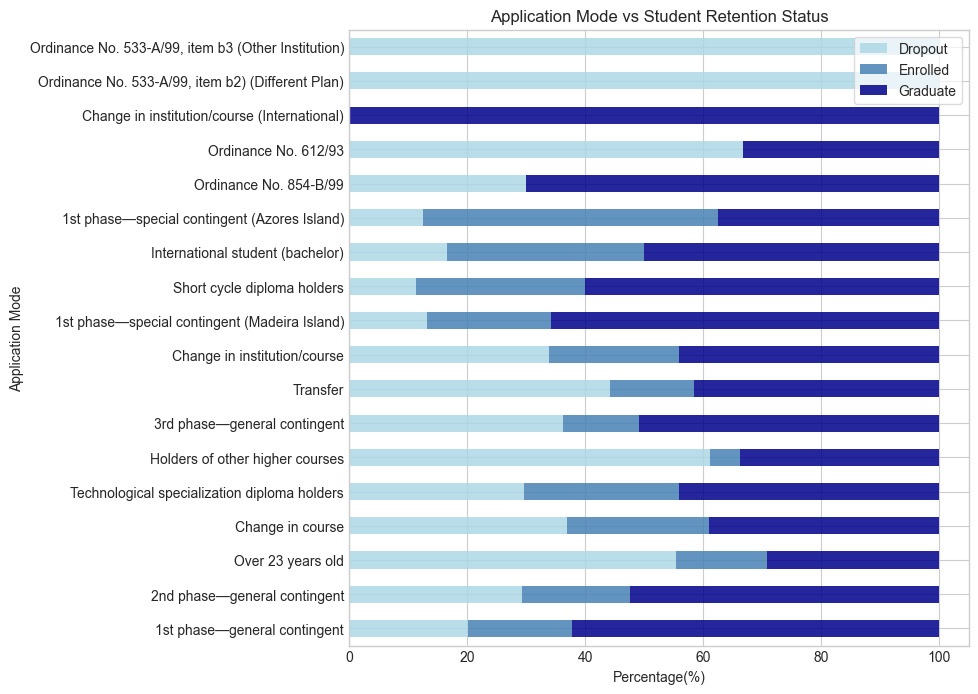

In [21]:
#Application Mode vs Student Retention Status (percentage)

df_applicationMode = pd.crosstab(df['Application mode'], df['Target'])
df_applicationMode_percentage = df_applicationMode.div(df_applicationMode.sum(axis=1), axis=0) * 100
df_applicationMode_percentage['Total'] = df_applicationMode.sum(axis =1)
df_applicationMode_percentage = df_applicationMode_percentage.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_applicationMode_percentage.plot(kind='barh', figsize=(8, 8), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Application Mode")
plt.title('Application Mode vs Student Retention Status')
plt.legend(framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

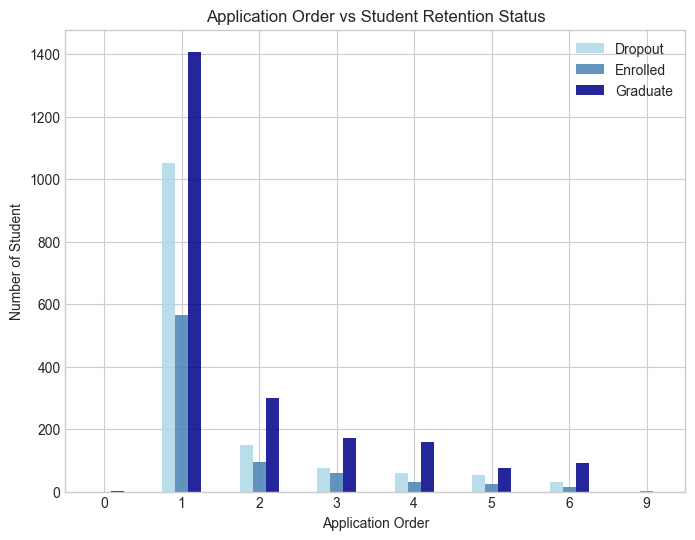

In [22]:
#Application Order vs Student Retention Status

df_applicationOrder = pd.crosstab(df['Application order'], df['Target'])
df_applicationOrder['Total'] = df_applicationOrder.sum(axis =1)
# df_applicationOrder = df_applicationOrder.sort_values(by='Total', ascending=False).drop(columns='Total')

df_applicationOrder =df_applicationOrder.drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_applicationOrder.plot(kind='bar', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Application Order vs Student Retention Status')
plt.ylabel("Number of Student")
plt.xlabel("Application Order")
plt.legend()
plt.xticks(rotation=0)
plt.show()

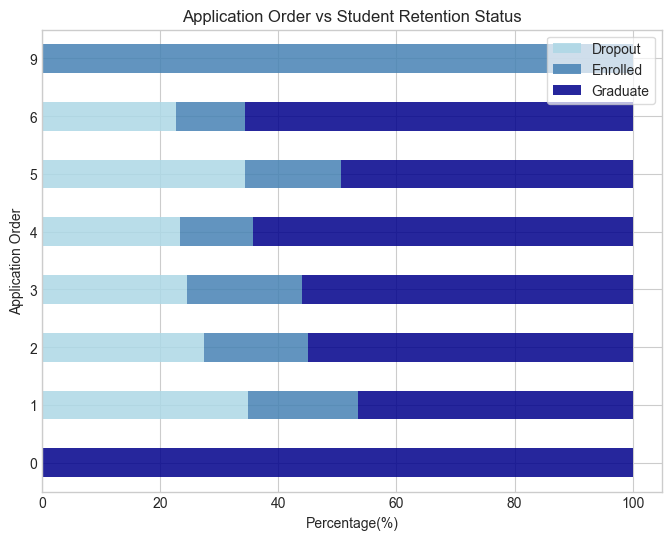

In [23]:
#Application Order vs Student Retention Status (percentage)

df_applicationOrder = pd.crosstab(df['Application order'], df['Target'])
df_applicationOrder_percentage = df_applicationOrder.div(df_applicationOrder.sum(axis=1), axis=0) * 100
df_applicationOrder_percentage['Total'] = df_applicationOrder.sum(axis =1)
df_applicationOrder_percentage = df_applicationOrder_percentage.drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_applicationOrder_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Application Order")
plt.title('Application Order vs Student Retention Status')
plt.legend(framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

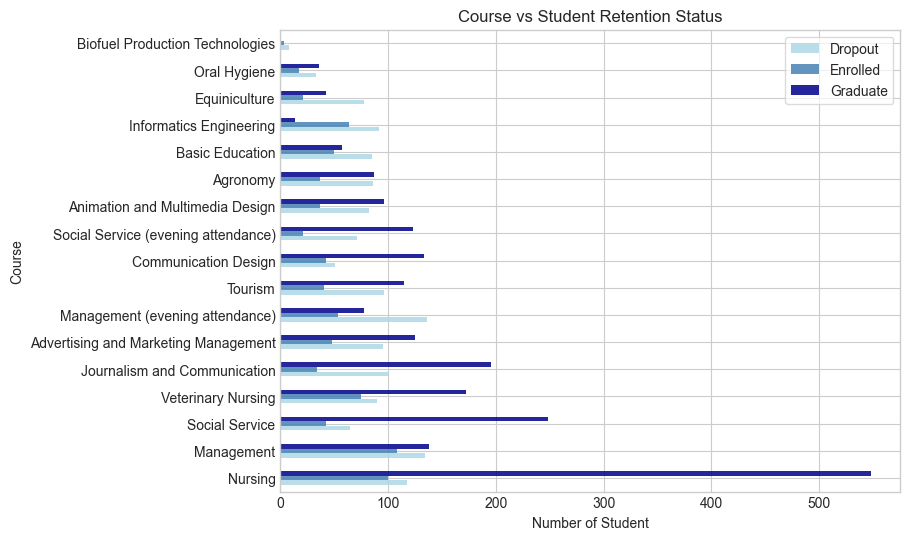

In [24]:
#Course vs Student Retention Status

df_Course = pd.crosstab(df['Course'], df['Target'])
df_Course['Total'] = df_Course.sum(axis =1)
df_Course = df_Course.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_Course.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Course vs Student Retention Status')
plt.xlabel("Number of Student")
plt.ylabel("Course")
plt.legend(framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

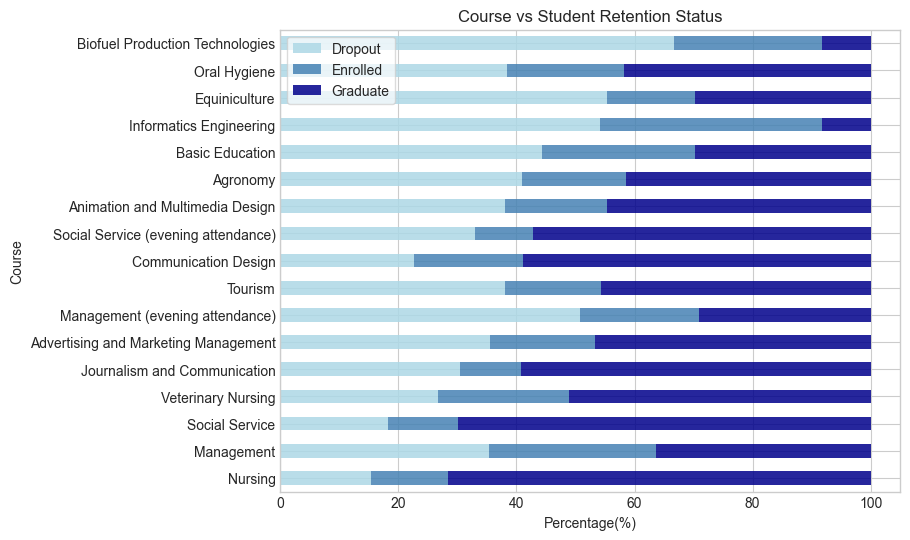

In [25]:
#Course vs Student Retention Status (percentage)

df_Course = pd.crosstab(df['Course'], df['Target'])
df_Course_percentage = df_Course.div(df_Course.sum(axis=1), axis=0) * 100
df_Course_percentage['Total'] = df_Course.sum(axis =1)
df_Course_percentage = df_Course_percentage.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_Course_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Course")
plt.title('Course vs Student Retention Status')
plt.legend(framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

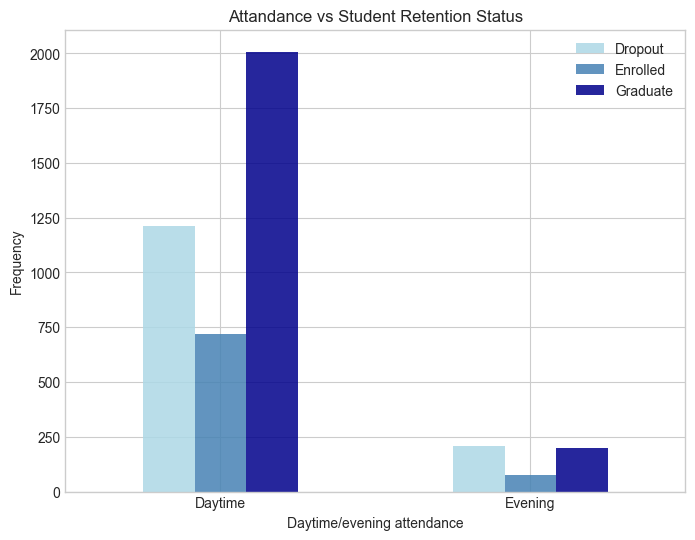

In [26]:
#Attandance vs Student Retention Status

df_attandance = pd.crosstab(df['Daytime/evening attendance'], df['Target'])
df_attandance['Total'] = df_attandance.sum(axis =1)
df_attandance = df_attandance.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_attandance.plot(kind='bar', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Attandance vs Student Retention Status')
plt.xlabel("Daytime/evening attendance")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=0)
plt.show()

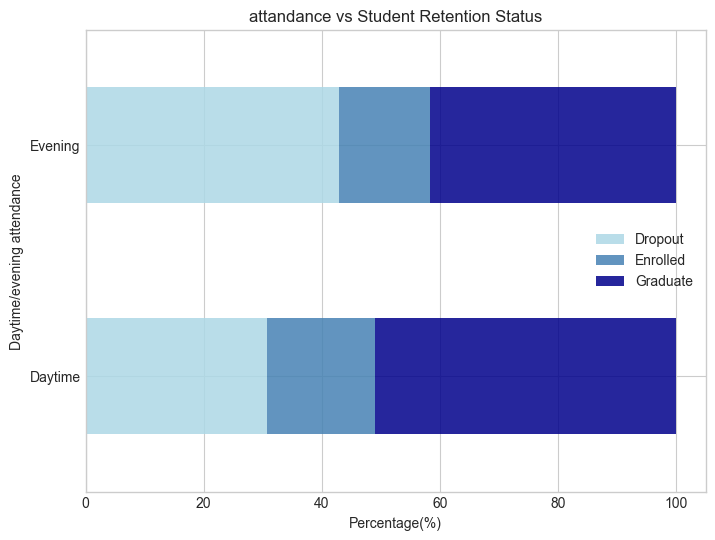

In [27]:
#attandance vs Student Retention Status (percentage)

df_attandance = pd.crosstab(df['Daytime/evening attendance'], df['Target'])
df_attandance_percentage = df_attandance.div(df_attandance.sum(axis=1), axis=0) * 100
df_attandance_percentage['Total'] = df_attandance.sum(axis =1)
df_attandance_percentage = df_attandance_percentage.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_attandance_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Daytime/evening attendance")
plt.title('attandance vs Student Retention Status')
plt.legend()
plt.xticks(rotation=0)
plt.show()

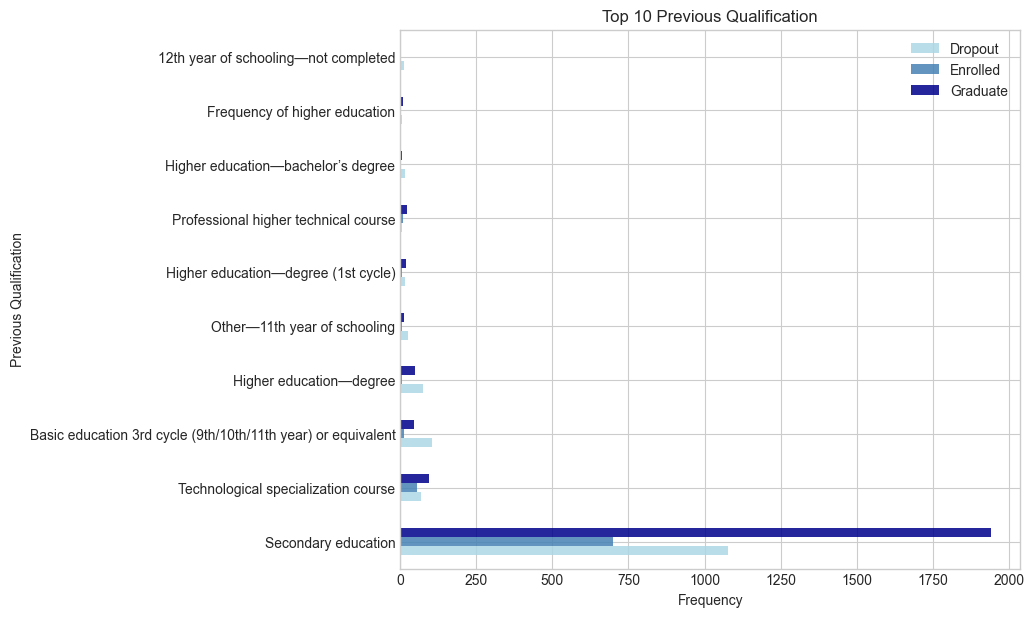

In [28]:
#Top 10 Previous Qualification

df_PrevQual = pd.crosstab(df['Previous qualification'], df['Target'])
df_PrevQual['Total'] = df_PrevQual.sum(axis =1)
df_PrevQual = df_PrevQual.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_PrevQual.plot(kind='barh', figsize=(8, 7), cmap=custom_cmap, alpha = 0.85)
plt.title('Top 10 Previous Qualification')
plt.xlabel("Frequency")
plt.ylabel("Previous Qualification")
plt.legend()
plt.xticks(rotation=0)
plt.show()

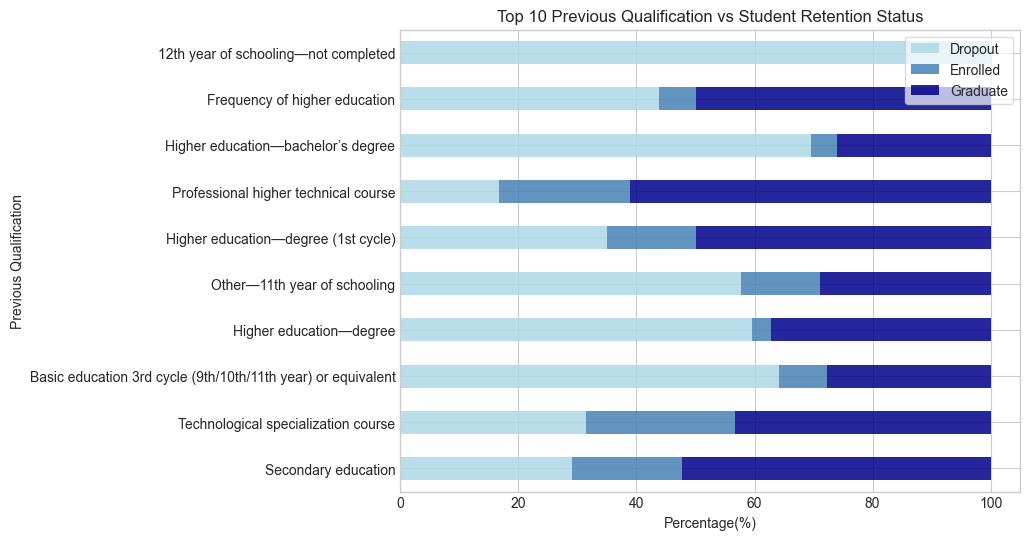

In [29]:
#Top 10 Previous Qualification(percentage)

df_PrevQual = pd.crosstab(df['Previous qualification'], df['Target'])
df_PrevQual_percentage = df_PrevQual.div(df_PrevQual.sum(axis=1), axis=0) * 100
df_PrevQual_percentage['Total'] = df_PrevQual.sum(axis =1)
df_PrevQual_percentage = df_PrevQual_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_PrevQual_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Previous Qualification")
plt.title('Top 10 Previous Qualification vs Student Retention Status')
plt.legend(framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

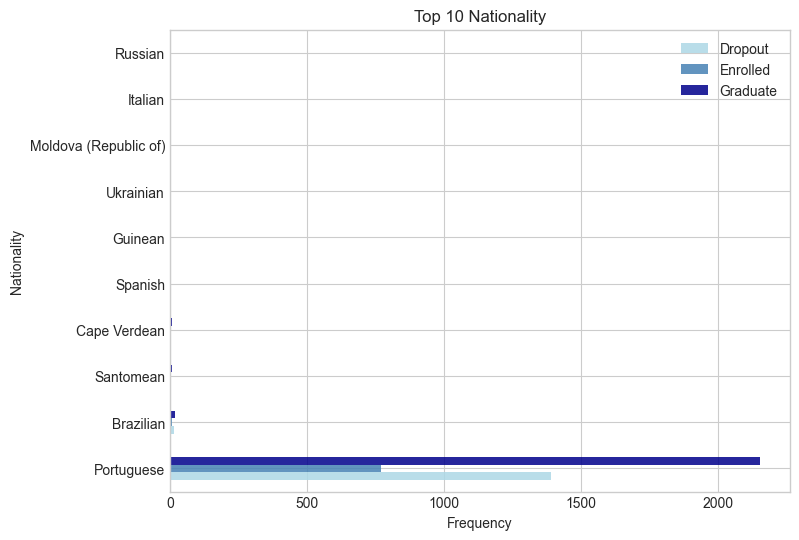

In [30]:
#Top 10 Nationality

df_nationality = pd.crosstab(df['Nacionality'], df['Target'])
df_nationality['Total'] = df_nationality.sum(axis =1)
df_nationality = df_nationality.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_nationality.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Top 10 Nationality')
plt.xlabel("Frequency")
plt.ylabel("Nationality")
plt.legend()
plt.xticks(rotation=0)
plt.show()

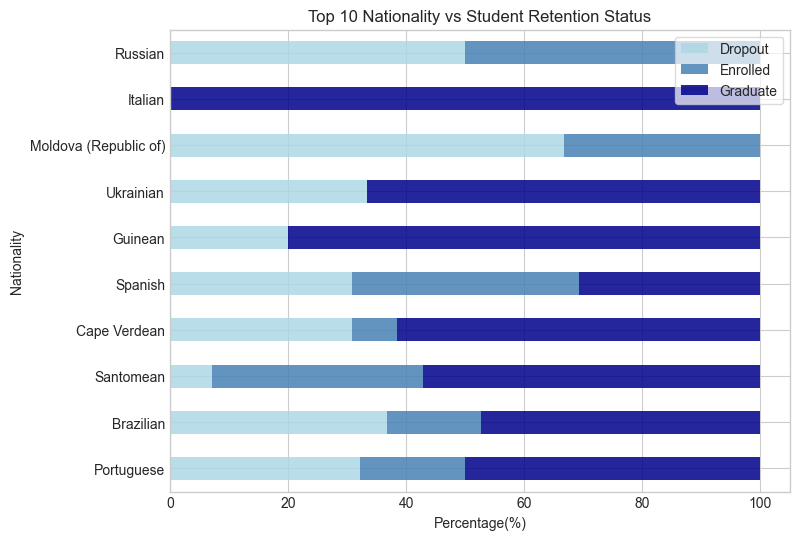

In [31]:
#Top 10 Nationality (percentage)

df_nationality = pd.crosstab(df['Nacionality'], df['Target'])
df_nationality_percentage = df_nationality.div(df_nationality.sum(axis=1), axis=0) * 100
df_nationality_percentage['Total'] = df_nationality.sum(axis =1)
df_nationality_percentage = df_nationality_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_nationality_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Nationality")
plt.title('Top 10 Nationality vs Student Retention Status')
plt.legend(framealpha=0.7, frameon=True)
plt.xticks(rotation=0)
plt.show()

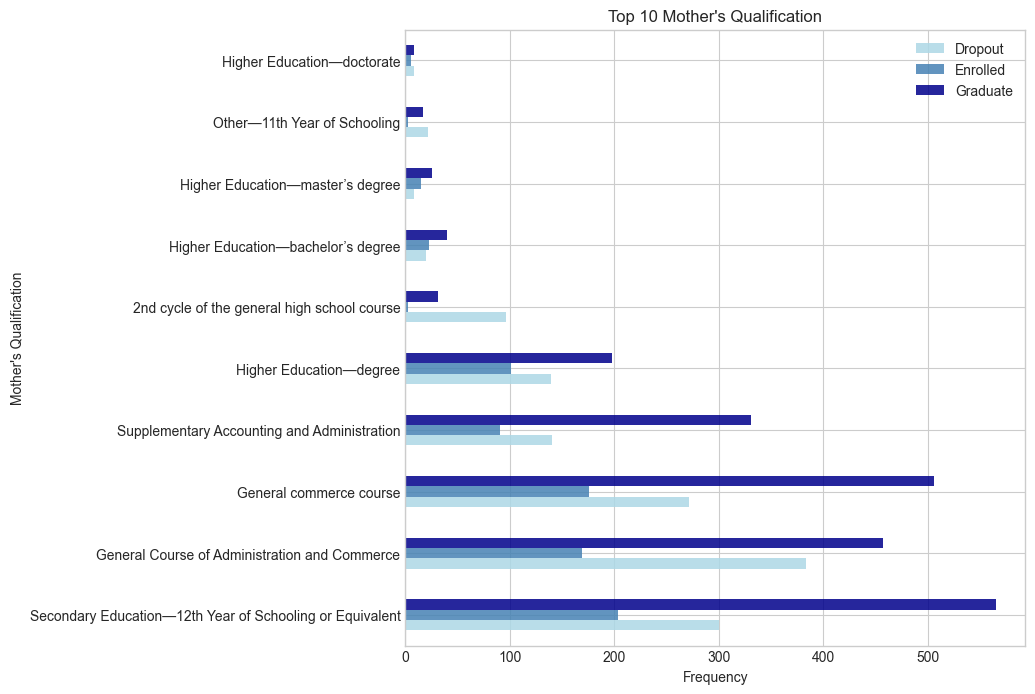

In [32]:
#Top 10 Mother's Qualification
df_motherQualification = pd.crosstab(df['Mother\'s qualification'], df['Target'])
df_motherQualification['Total'] = df_motherQualification.sum(axis =1)
df_motherQualification = df_motherQualification.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_motherQualification.plot(kind='barh', figsize=(8, 8), cmap=custom_cmap, alpha = 0.85)
plt.title('Top 10 Mother\'s Qualification')
plt.ylabel("Mother's Qualification")
plt.xlabel("Frequency")
plt.legend()
plt.xticks(rotation=0)
plt.show()

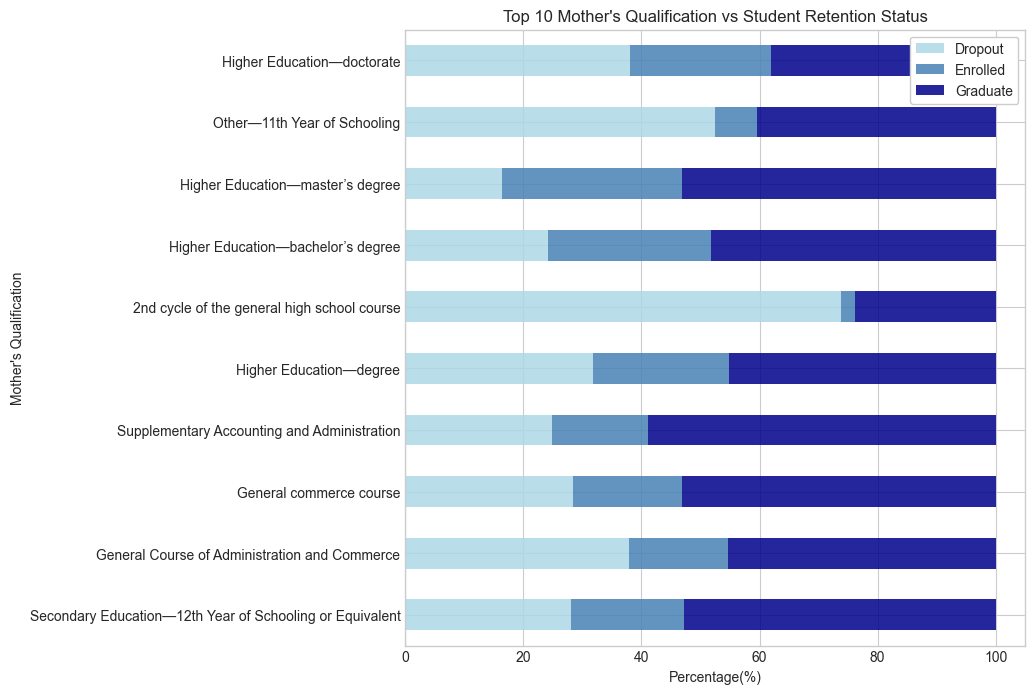

In [33]:
#Top 10 Mother Qualification (percentage)

df_motherQualification = pd.crosstab(df['Mother\'s qualification'], df['Target'])
df_motherQualification_percentage = df_motherQualification.div(df_motherQualification.sum(axis=1), axis=0) * 100
df_motherQualification_percentage['Total'] = df_motherQualification.sum(axis =1)
df_motherQualification_percentage = df_motherQualification_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_motherQualification_percentage.plot(kind='barh', figsize=(8, 8), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Mother's Qualification")
plt.title('Top 10 Mother\'s Qualification vs Student Retention Status')
plt.legend(framealpha=1, frameon=True)
plt.xticks(rotation=0)
plt.show()

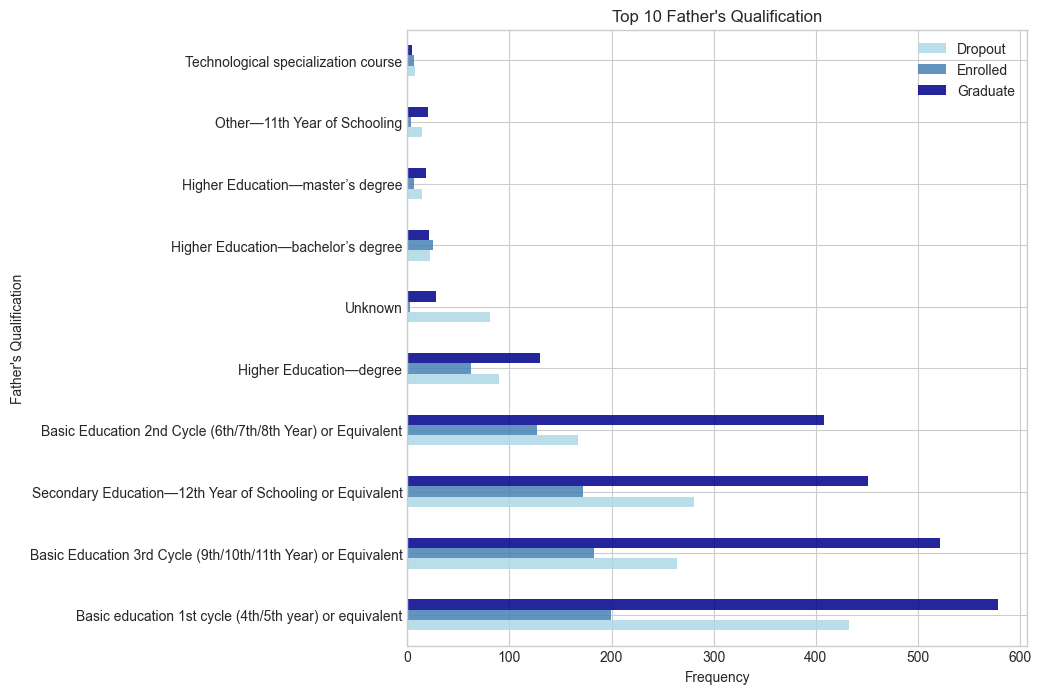

In [34]:
#Top 10 Father's Qualification

df_FatherQualification = pd.crosstab(df['Father\'s qualification'], df['Target'])
df_FatherQualification['Total'] = df_FatherQualification.sum(axis =1)
df_FatherQualification = df_FatherQualification.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_FatherQualification.plot(kind='barh', figsize=(8, 8), cmap=custom_cmap, alpha = 0.85)
plt.title('Top 10 Father\'s Qualification')
plt.ylabel("Father's Qualification")
plt.xlabel("Frequency")
plt.legend()
plt.xticks(rotation=0)
plt.show()

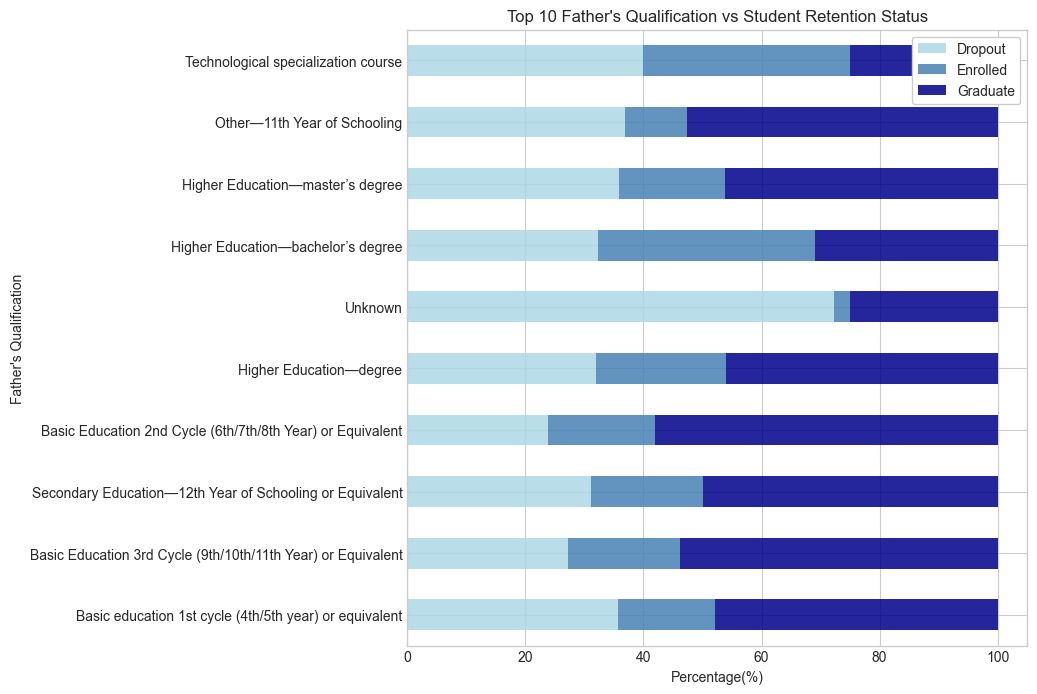

In [35]:
#Top 10 Father's Qualification (percentage)

df_FatherQualification = pd.crosstab(df['Father\'s qualification'], df['Target'])
df_FatherQualification_percentage = df_FatherQualification.div(df_FatherQualification.sum(axis=1), axis=0) * 100
df_FatherQualification_percentage['Total'] = df_FatherQualification.sum(axis =1)
df_FatherQualification_percentage = df_FatherQualification_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_FatherQualification_percentage.plot(kind='barh', figsize=(8, 8), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Father's Qualification")
plt.title('Top 10 Father\'s Qualification vs Student Retention Status')
plt.legend(framealpha=1, frameon=True)
plt.xticks(rotation=0)
plt.show()

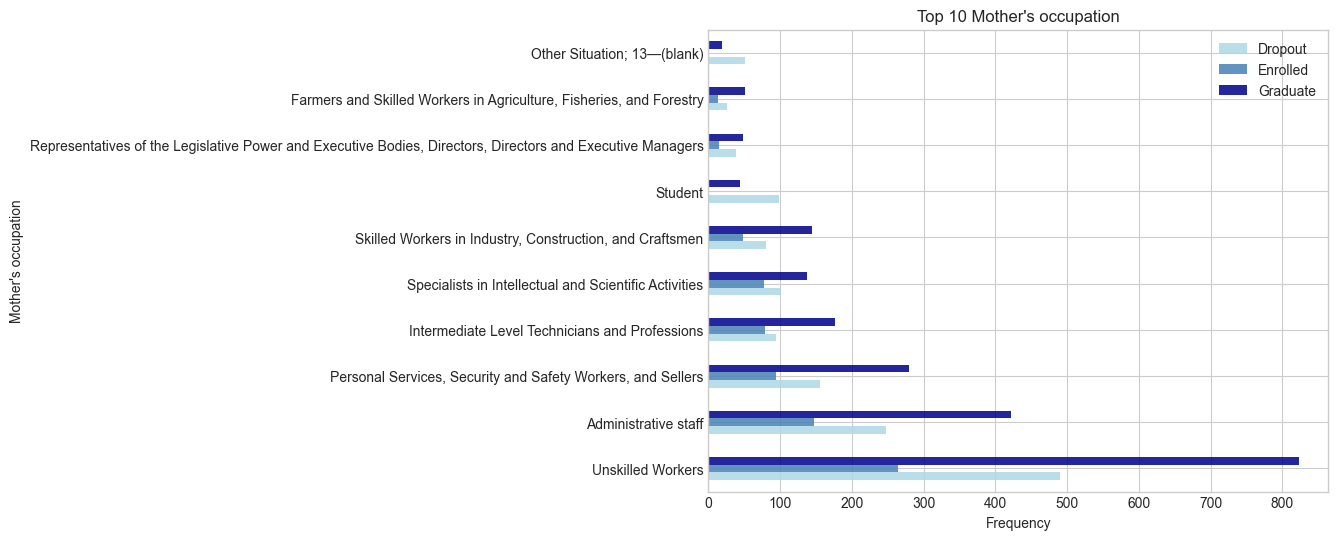

In [36]:
#Top 10 Mother's occupation 

df_motheroccupation = pd.crosstab(df['Mother\'s occupation'], df['Target'])
df_motheroccupation['Total'] = df_motheroccupation.sum(axis =1)
df_motheroccupation = df_motheroccupation.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_motheroccupation.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Top 10 Mother\'s occupation')
plt.ylabel("Mother's occupation")
plt.xlabel("Frequency")
plt.legend()
plt.xticks(rotation=0)
plt.show()

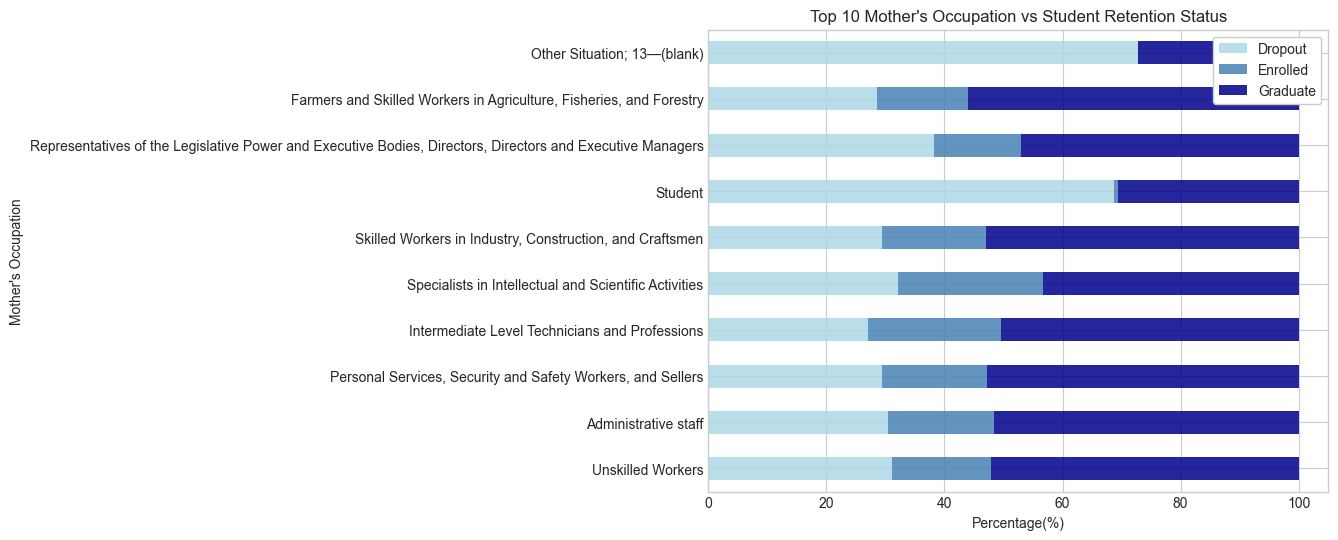

In [37]:
#Top 10 Mother's Occupation (percentage)

df_motheroccupation = pd.crosstab(df['Mother\'s occupation'], df['Target'])
df_motheroccupation_percentage = df_motheroccupation.div(df_motheroccupation.sum(axis=1), axis=0) * 100
df_motheroccupation_percentage['Total'] = df_motheroccupation.sum(axis =1)
df_motheroccupation_percentage = df_motheroccupation_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_motheroccupation_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Mother's Occupation")
plt.title('Top 10 Mother\'s Occupation vs Student Retention Status')
plt.legend(framealpha=1, frameon=True)
plt.xticks(rotation=0)
plt.show()

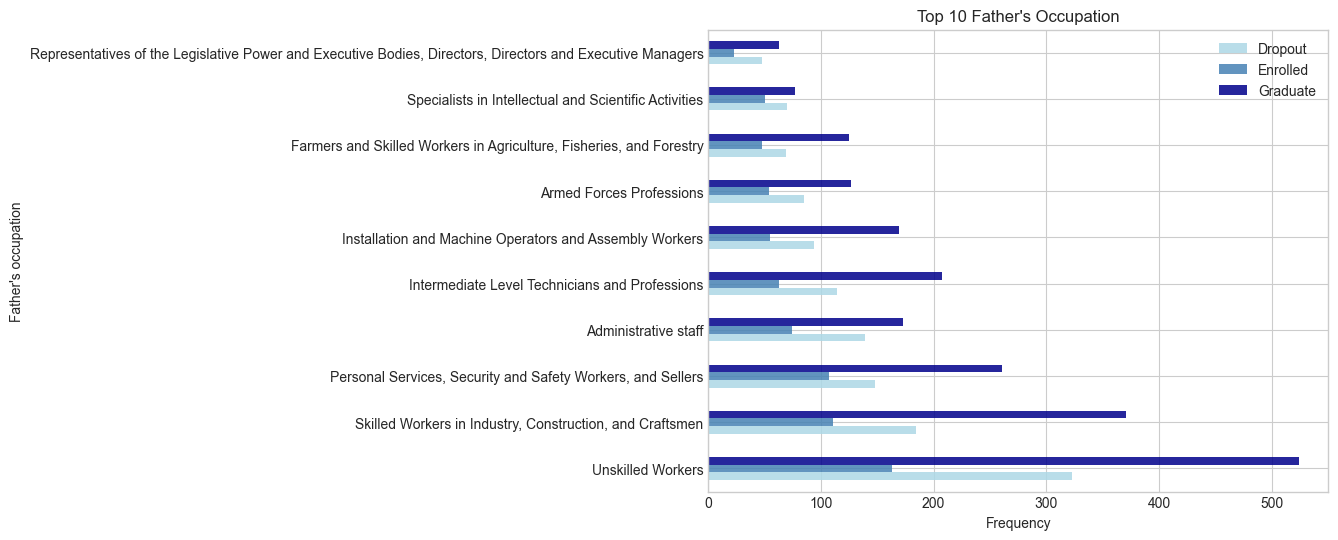

In [38]:
#Top 10 Father's occupation

df_Fatheroccupation = pd.crosstab(df['Father\'s occupation'], df['Target'])
df_Fatheroccupation['Total'] = df_Fatheroccupation.sum(axis =1)
df_Fatheroccupation = df_Fatheroccupation.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_Fatheroccupation.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Top 10 Father\'s Occupation')
plt.ylabel("Father's occupation")
plt.xlabel("Frequency")
plt.legend()
plt.xticks(rotation=0)
plt.show()

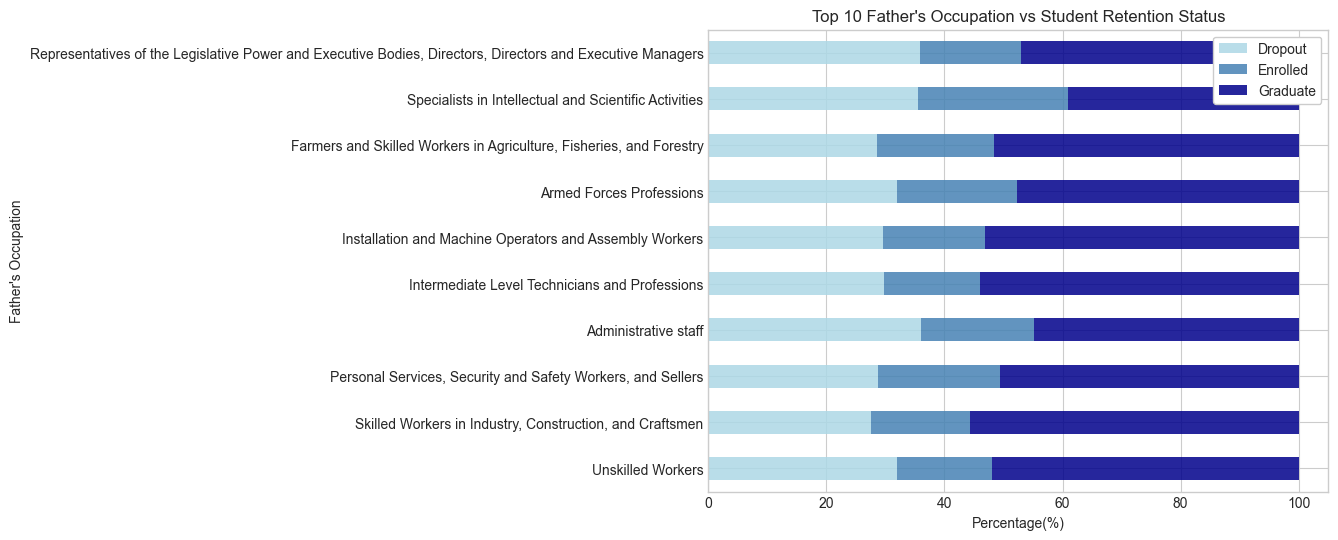

In [39]:
#Top 10 Father's Occupation (percentage)

df_Fatheroccupation = pd.crosstab(df['Father\'s occupation'], df['Target'])
df_Fatheroccupation_percentage = df_Fatheroccupation.div(df_Fatheroccupation.sum(axis=1), axis=0) * 100
df_Fatheroccupation_percentage['Total'] = df_Fatheroccupation.sum(axis =1)
df_Fatheroccupation_percentage = df_Fatheroccupation_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_Fatheroccupation_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Father's Occupation")
plt.title('Top 10 Father\'s Occupation vs Student Retention Status')
plt.legend(framealpha=1, frameon=True)
plt.xticks(rotation=0)
plt.show()

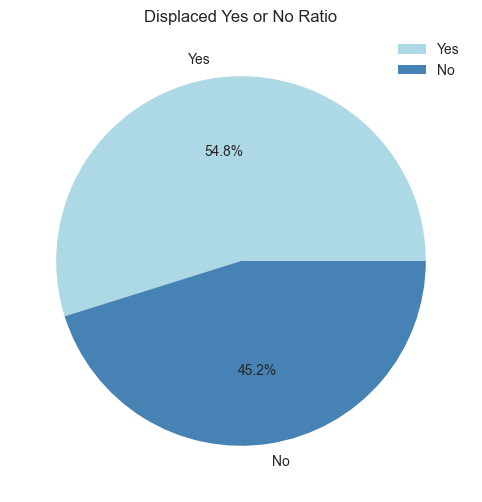

In [40]:
#Displaced Yes or No Pie Chart

displace_Yes = df[(df['Displaced'] == 'Yes')].iloc[:,1].count()
displace_No = df[(df['Displaced'] == 'No')].iloc[:,1].count()

plt.figure(figsize=(8,6))
plt.pie([displace_Yes,displace_No], labels = ['Yes', 'No'],  shadow = False, autopct = '%.1lf%%', 
        startangle=0, colors= ['#ADD8E6', '#4682B4'])
plt.title("Displaced Yes or No Ratio")
plt.legend()
plt.show()


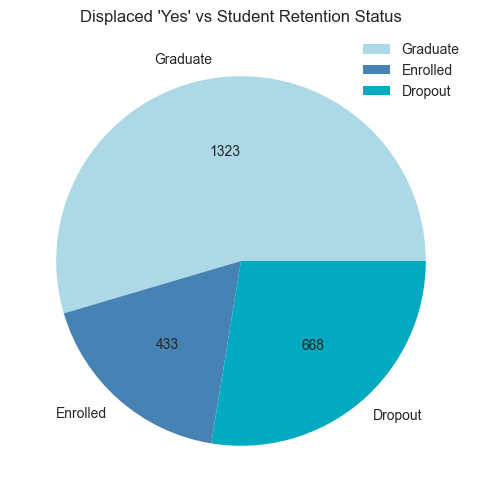

In [41]:
#Displaced 'Yes'

displace_Graduate = df[(df['Displaced'] == 'Yes') & (df['Target'] == 'Graduate')].iloc[:,1].count()
displace_Enrolled = df[(df['Displaced'] == 'Yes')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
displace_Dropout = df[(df['Displaced'] == 'Yes')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [displace_Graduate, displace_Enrolled, displace_Dropout]

plt.figure(figsize=(8,6))
plt.pie([displace_Graduate,displace_Enrolled,displace_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Displaced 'Yes' vs Student Retention Status")
plt.legend()
plt.show()


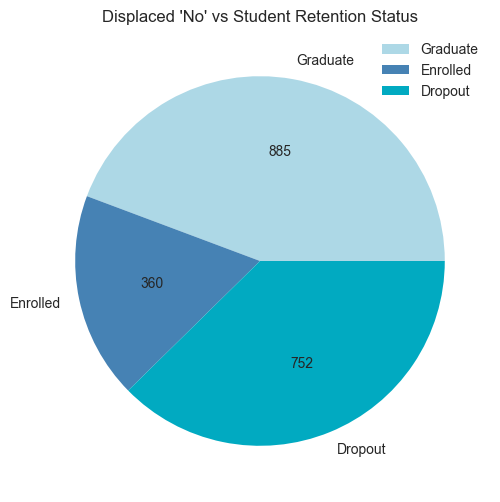

In [42]:
#Displaced 'No'

displace_Graduate = df[(df['Displaced'] == 'No') & (df['Target'] == 'Graduate')].iloc[:,1].count()
displace_Enrolled = df[(df['Displaced'] == 'No')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
displace_Dropout = df[(df['Displaced'] == 'No')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [displace_Graduate, displace_Enrolled, displace_Dropout]

plt.figure(figsize=(8,6))
plt.pie([displace_Graduate,displace_Enrolled,displace_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Displaced 'No' vs Student Retention Status")
plt.legend()
plt.show()


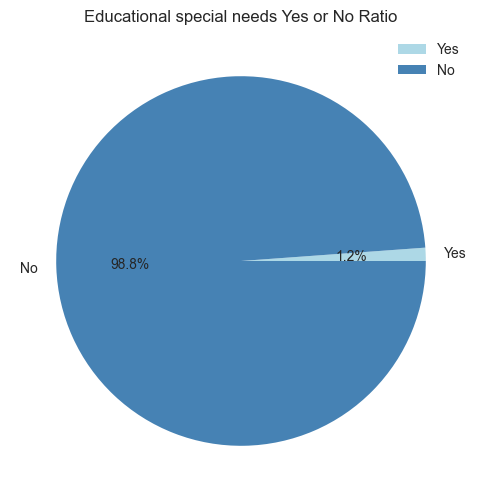

In [43]:
#Educational special needs Yes or No Pie Chart

ESN_Yes = df[(df['Educational special needs'] == 'Yes')].iloc[:,1].count()
ESN_No = df[(df['Educational special needs'] == 'No')].iloc[:,1].count()

plt.figure(figsize=(8,6))
plt.pie([ESN_Yes,ESN_No], labels = ['Yes', 'No'],  shadow = False, autopct = '%.1lf%%', 
        startangle=0, colors= ['#ADD8E6', '#4682B4'])
plt.title("Educational special needs Yes or No Ratio")
plt.legend()
plt.show()


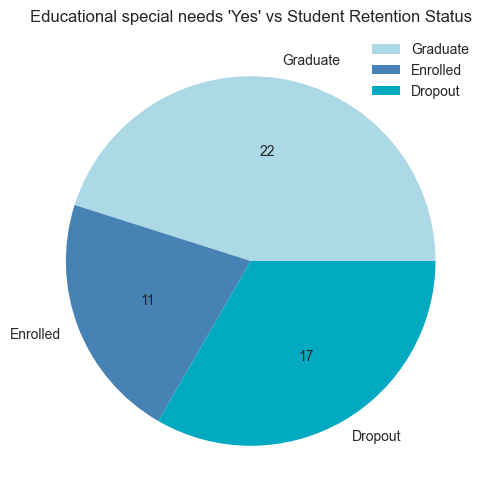

In [44]:
#Educational special needs 'Yes'

ESN_Graduate = df[(df['Educational special needs'] == 'Yes') & (df['Target'] == 'Graduate')].iloc[:,1].count()
ESN_Enrolled = df[(df['Educational special needs'] == 'Yes')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
ESN_Dropout = df[(df['Educational special needs'] == 'Yes')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [ESN_Graduate, ESN_Enrolled, ESN_Dropout]

plt.figure(figsize=(8,6))
plt.pie([ESN_Graduate,ESN_Enrolled,ESN_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Educational special needs 'Yes' vs Student Retention Status")
plt.legend()
plt.show()

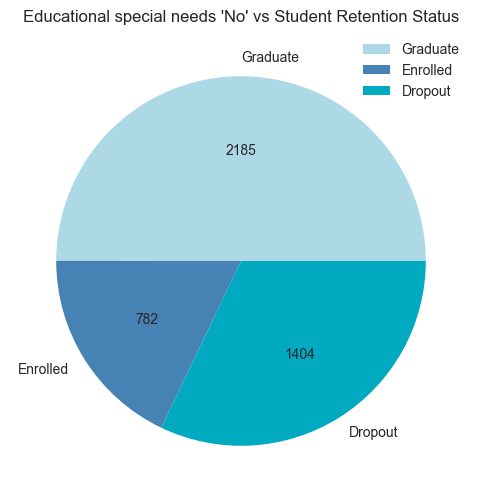

In [45]:
#Educational special needs 'No'

ESN_Graduate = df[(df['Educational special needs'] == 'No') & (df['Target'] == 'Graduate')].iloc[:,1].count()
ESN_Enrolled = df[(df['Educational special needs'] == 'No')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
ESN_Dropout = df[(df['Educational special needs'] == 'No')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [ESN_Graduate, ESN_Enrolled, ESN_Dropout]

plt.figure(figsize=(8,6))
plt.pie([ESN_Graduate,ESN_Enrolled,ESN_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Educational special needs 'No' vs Student Retention Status")
plt.legend()
plt.show()

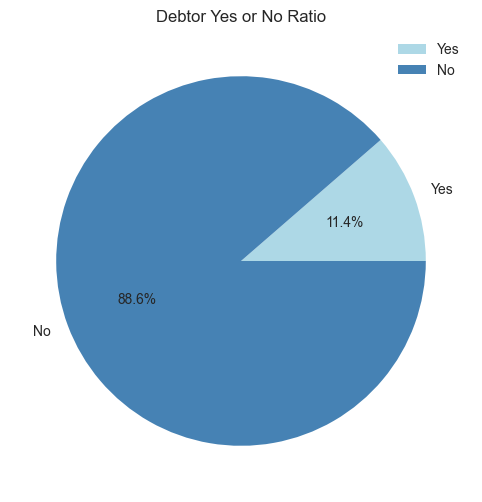

In [46]:
#Debtor Yes or No Pie Chart

Debtor_Yes = df[(df['Debtor'] == 'Yes')].iloc[:,1].count()
Debtor_No = df[(df['Debtor'] == 'No')].iloc[:,1].count()

plt.figure(figsize=(8,6))
plt.pie([Debtor_Yes,Debtor_No], labels = ['Yes', 'No'],  shadow = False, autopct = '%.1lf%%', 
        startangle=0, colors= ['#ADD8E6', '#4682B4'])
plt.title("Debtor Yes or No Ratio")
plt.legend()
plt.show()


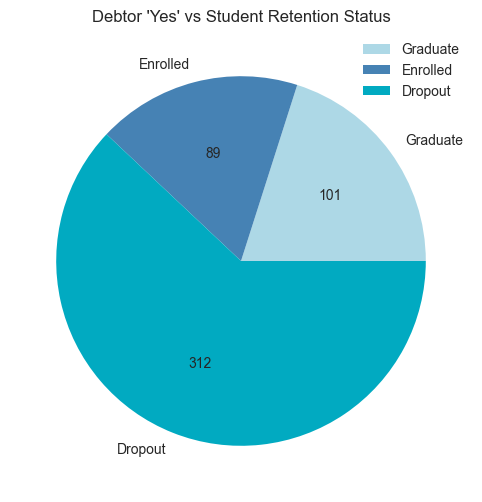

In [47]:
#Debtor 'Yes'

Debtor_Graduate = df[(df['Debtor'] == 'Yes') & (df['Target'] == 'Graduate')].iloc[:,1].count()
Debtor_Enrolled = df[(df['Debtor'] == 'Yes')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
Debtor_Dropout = df[(df['Debtor'] == 'Yes')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [Debtor_Graduate, Debtor_Enrolled, Debtor_Dropout]

plt.figure(figsize=(8,6))
plt.pie([Debtor_Graduate,Debtor_Enrolled,Debtor_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Debtor 'Yes' vs Student Retention Status")
plt.legend()
plt.show()

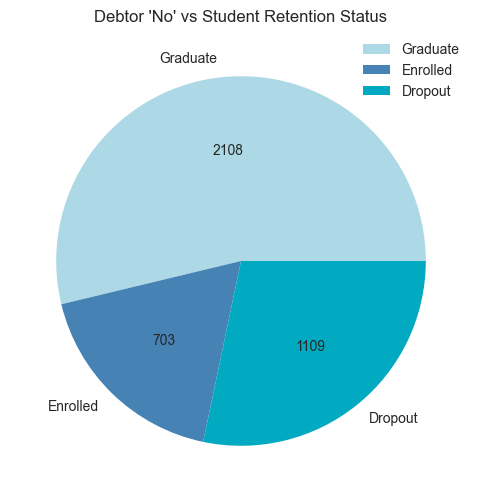

In [48]:
#Debtor 'No'

Debtor_Graduate = df[(df['Debtor'] == 'No') & (df['Target'] == 'Graduate')].iloc[:,1].count()
Debtor_Enrolled = df[(df['Debtor'] == 'No')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
Debtor_Dropout = df[(df['Debtor'] == 'No')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [Debtor_Graduate, Debtor_Enrolled, Debtor_Dropout]

plt.figure(figsize=(8,6))
plt.pie([Debtor_Graduate,Debtor_Enrolled,Debtor_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Debtor 'No' vs Student Retention Status")
plt.legend()
plt.show()

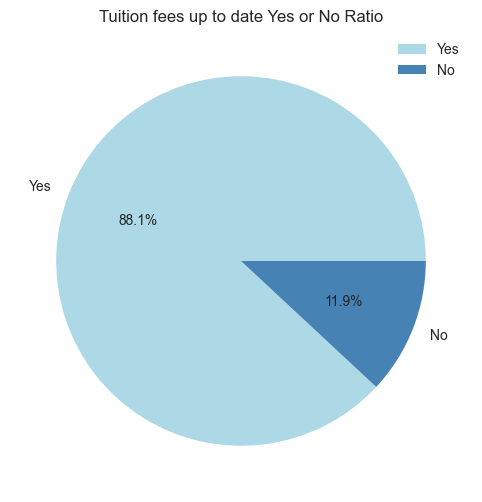

In [49]:
#Tuition fees up to date Yes or No Pie Chart

TFUtD_Yes = df[(df['Tuition fees up to date'] == 'Yes')].iloc[:,1].count()
TFUtD_No = df[(df['Tuition fees up to date'] == 'No')].iloc[:,1].count()

plt.figure(figsize=(8,6))
plt.pie([TFUtD_Yes,TFUtD_No], labels = ['Yes', 'No'],  shadow = False, autopct = '%.1lf%%', 
        startangle=0, colors= ['#ADD8E6', '#4682B4'])
plt.title("Tuition fees up to date Yes or No Ratio")
plt.legend()
plt.show()


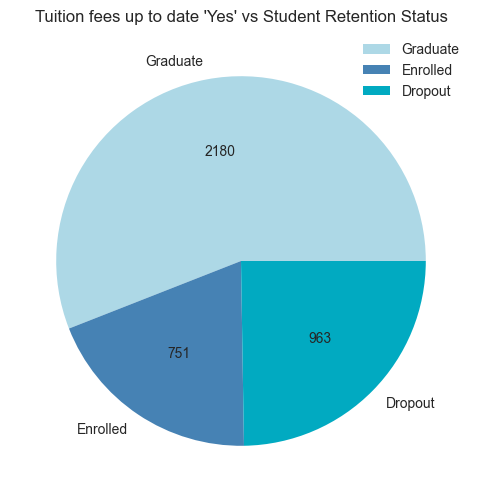

In [50]:
#Tuition fees up to date 'Yes'

TFUtD_Graduate = df[(df['Tuition fees up to date'] == 'Yes') & (df['Target'] == 'Graduate')].iloc[:,1].count()
TFUtD_Enrolled = df[(df['Tuition fees up to date'] == 'Yes')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
TFUtD_Dropout = df[(df['Tuition fees up to date'] == 'Yes')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [TFUtD_Graduate, TFUtD_Enrolled, TFUtD_Dropout]

plt.figure(figsize=(8,6))
plt.pie([TFUtD_Graduate,TFUtD_Enrolled,TFUtD_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Tuition fees up to date 'Yes' vs Student Retention Status")
plt.legend()
plt.show()

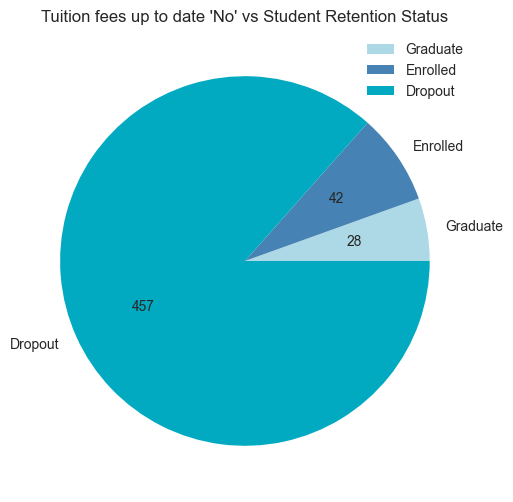

In [51]:
#Tuition fees up to date 'No'

TFUtD_Graduate = df[(df['Tuition fees up to date'] == 'No') & (df['Target'] == 'Graduate')].iloc[:,1].count()
TFUtD_Enrolled = df[(df['Tuition fees up to date'] == 'No')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
TFUtD_Dropout = df[(df['Tuition fees up to date'] == 'No')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [TFUtD_Graduate, TFUtD_Enrolled, TFUtD_Dropout]

plt.figure(figsize=(8,6))
plt.pie([TFUtD_Graduate,TFUtD_Enrolled,TFUtD_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Tuition fees up to date 'No' vs Student Retention Status")
plt.legend()
plt.show()

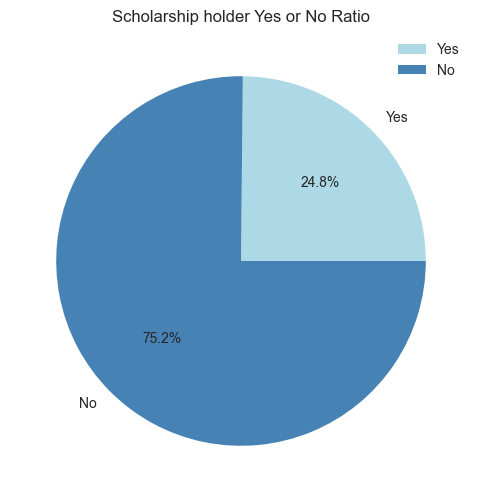

In [52]:
#Scholarship holder Yes or No Pie Chart

SH_Yes = df[(df['Scholarship holder'] == 'Yes')].iloc[:,1].count()
SH_No = df[(df['Scholarship holder'] == 'No')].iloc[:,1].count()

plt.figure(figsize=(8,6))
plt.pie([SH_Yes,SH_No], labels = ['Yes', 'No'],  shadow = False, autopct = '%.1lf%%', 
        startangle=0, colors= ['#ADD8E6', '#4682B4'])
plt.title("Scholarship holder Yes or No Ratio")
plt.legend()
plt.show()


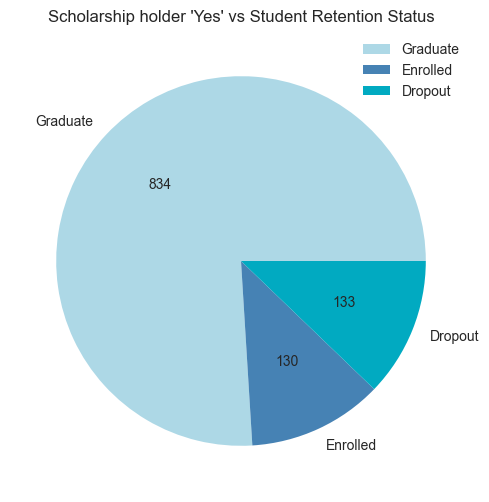

In [53]:
#Scholarship holder 'Yes'

SH_Graduate = df[(df['Scholarship holder'] == 'Yes') & (df['Target'] == 'Graduate')].iloc[:,1].count()
SH_Enrolled = df[(df['Scholarship holder'] == 'Yes')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
SH_Dropout = df[(df['Scholarship holder'] == 'Yes')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [SH_Graduate, SH_Enrolled, SH_Dropout]

plt.figure(figsize=(8,6))
plt.pie([SH_Graduate,SH_Enrolled,SH_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Scholarship holder 'Yes' vs Student Retention Status")
plt.legend()
plt.show()

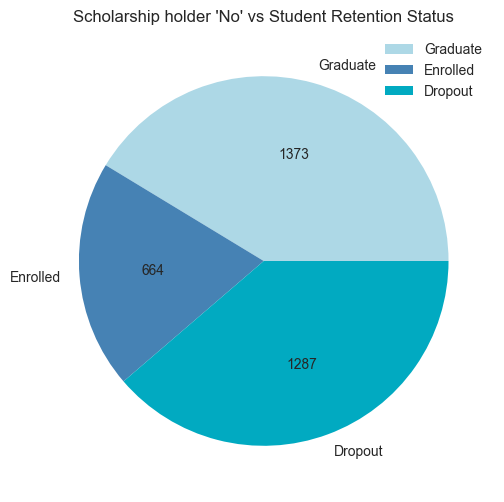

In [54]:
#Scholarship holder 'No'

SH_Graduate = df[(df['Scholarship holder'] == 'No') & (df['Target'] == 'Graduate')].iloc[:,1].count()
SH_Enrolled = df[(df['Scholarship holder'] == 'No')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
SH_Dropout = df[(df['Scholarship holder'] == 'No')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [SH_Graduate, SH_Enrolled, SH_Dropout]

plt.figure(figsize=(8,6))
plt.pie([SH_Graduate,SH_Enrolled,SH_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("Scholarship holder 'No' vs Student Retention Status")
plt.legend()
plt.show()

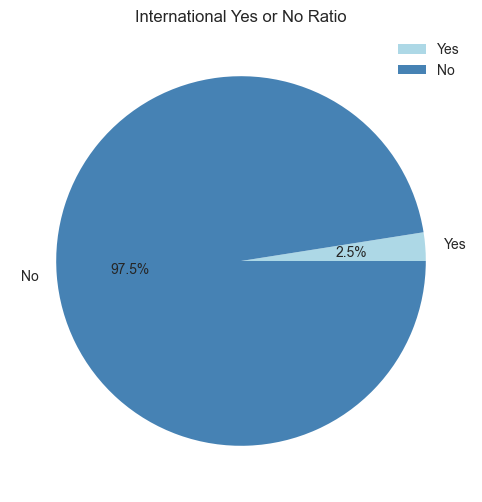

In [55]:
#International Yes or No Pie Chart

International_Yes = df[(df['International'] == 'Yes')].iloc[:,1].count()
International_No = df[(df['International'] == 'No')].iloc[:,1].count()

plt.figure(figsize=(8,6))
plt.pie([International_Yes,International_No], labels = ['Yes', 'No'],  shadow = False, autopct = '%.1lf%%', 
        startangle=0, colors= ['#ADD8E6', '#4682B4'])
plt.title("International Yes or No Ratio")
plt.legend()
plt.show()


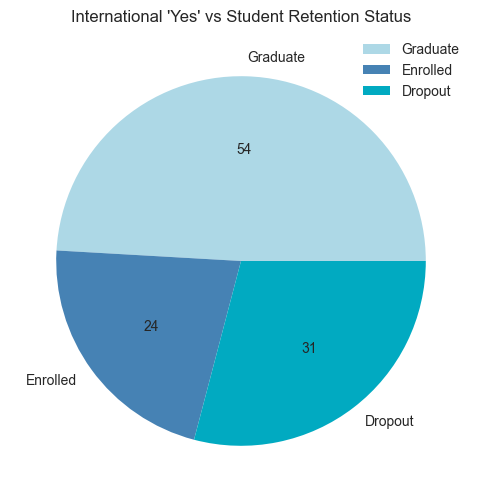

In [56]:
#International 'Yes'

International_Graduate = df[(df['International'] == 'Yes') & (df['Target'] == 'Graduate')].iloc[:,1].count()
International_Enrolled = df[(df['International'] == 'Yes')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
International_Dropout = df[(df['International'] == 'Yes')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [International_Graduate, International_Enrolled, International_Dropout]

plt.figure(figsize=(8,6))
plt.pie([International_Graduate,International_Enrolled,International_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("International 'Yes' vs Student Retention Status")
plt.legend()
plt.show()

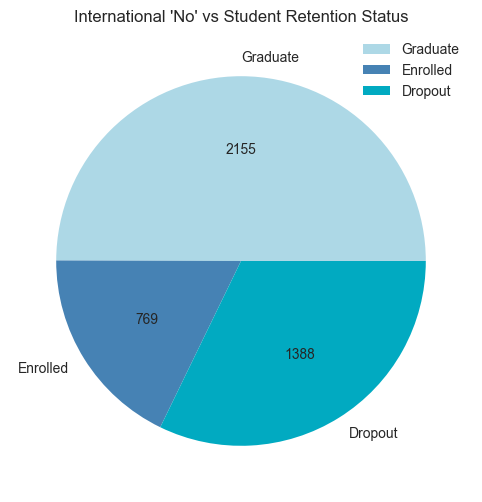

In [57]:
#International 'No'

International_Graduate = df[(df['International'] == 'No') & (df['Target'] == 'Graduate')].iloc[:,1].count()
International_Enrolled = df[(df['International'] == 'No')& (df['Target'] == 'Enrolled')].iloc[:,1].count()
International_Dropout = df[(df['International'] == 'No')& (df['Target'] == 'Dropout')].iloc[:,1].count()

values = [International_Graduate, International_Enrolled, International_Dropout]

plt.figure(figsize=(8,6))
plt.pie([International_Graduate,International_Enrolled,International_Dropout], labels = ['Graduate', 'Enrolled', 'Dropout'],  shadow = False, autopct = lambda p: f'{int(p * sum(values) / 100)}', 
        startangle=0, colors= ['#ADD8E6', '#4682B4', '#01AAC1'])
plt.title("International 'No' vs Student Retention Status")
plt.legend()
plt.show()

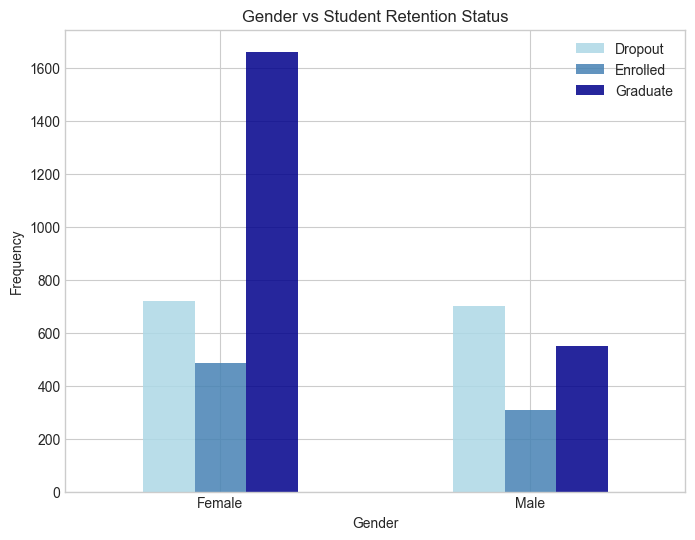

In [58]:
#Gender vs Student Retention Status

df_Gender = pd.crosstab(df['Gender'], df['Target'])
df_Gender['Total'] = df_Gender.sum(axis =1)
df_Gender = df_Gender.sort_values(by='Total', ascending=False).drop(columns='Total')

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_Gender.plot(kind='bar', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85)
plt.title('Gender vs Student Retention Status')
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=0)
plt.show()

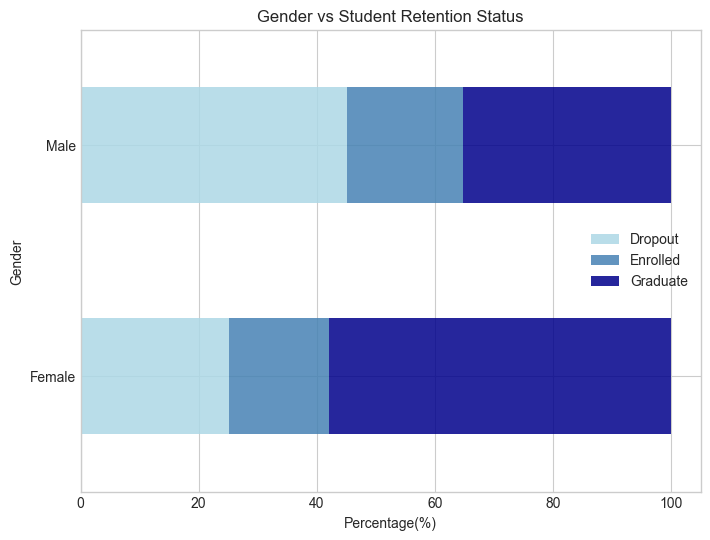

In [59]:
#Gender vs Student Retention Status (percentage)

df_Gender = pd.crosstab(df['Gender'], df['Target'])
df_Gender_percentage = df_Gender.div(df_Gender.sum(axis=1), axis=0) * 100
df_Gender_percentage['Total'] = df_Gender.sum(axis =1)
df_Gender_percentage = df_Gender_percentage.sort_values(by='Total', ascending=False).drop(columns='Total').iloc[:10]

custom_cmap = ListedColormap(['#ADD8E6', '#4682B4', '#00008B'])

df_Gender_percentage.plot(kind='barh', figsize=(8, 6), cmap=custom_cmap, alpha = 0.85, stacked= True)
plt.xlabel("Percentage(%)")
plt.ylabel("Gender")
plt.title('Gender vs Student Retention Status')
plt.legend()
plt.xticks(rotation=0)
plt.show()

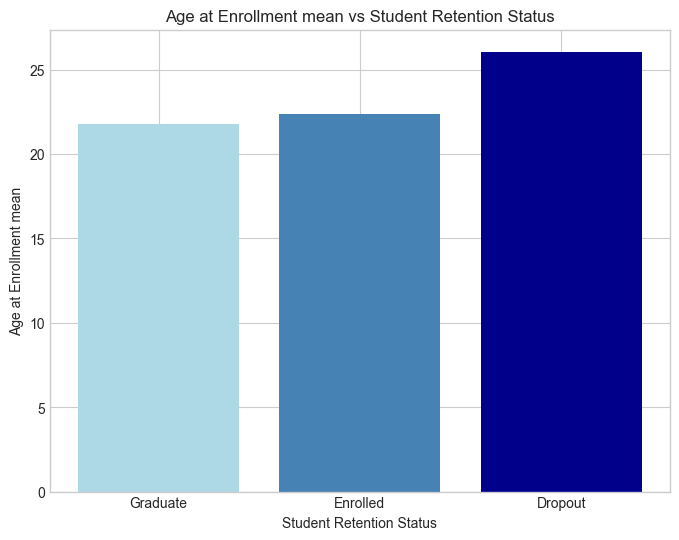

In [60]:
#Age at Enrollment vs Student Retenton Status

AgeGraduate = df[(df['Target'] == 'Graduate')].iloc[:,17].mean()
AgeEnrolled = df[(df['Target'] == 'Enrolled')].iloc[:,17].mean()
AgeDropout = df[(df['Target'] == 'Dropout')].iloc[:,17].mean()

plt.figure(figsize= (8,6))
plt.title("Age at Enrollment mean vs Student Retention Status")
plt.xlabel("Student Retention Status")
plt.ylabel("Age at Enrollment mean")
plt.bar(['Graduate', 'Enrolled', 'Dropout'], [AgeGraduate, AgeEnrolled, AgeDropout], color = ['#ADD8E6', '#4682B4', '#00008B'], alpha= 1)
plt.show()

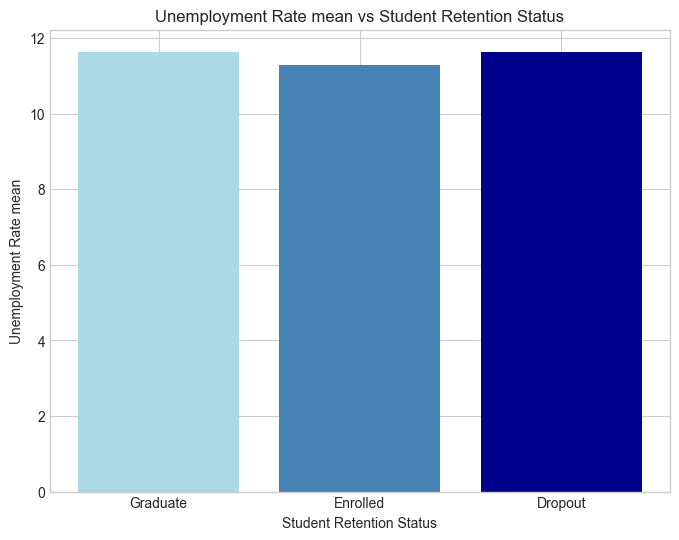

In [61]:
#Unemployment Rate Rate vs Student Retenton Status

UnemploymentRateGraduate = df[(df['Target'] == 'Graduate')].iloc[:,19].mean()
UnemploymentRateEnrolled = df[(df['Target'] == 'Enrolled')].iloc[:,19].mean()
UnemploymentRateDropout = df[(df['Target'] == 'Dropout')].iloc[:,19].mean()

plt.figure(figsize= (8,6))
plt.title("Unemployment Rate mean vs Student Retention Status")
plt.xlabel("Student Retention Status")
plt.ylabel("Unemployment Rate mean")
plt.bar(['Graduate', 'Enrolled', 'Dropout'], [UnemploymentRateGraduate, UnemploymentRateEnrolled, UnemploymentRateDropout], color = ['#ADD8E6', '#4682B4', '#00008B'], alpha= 1)
plt.show()

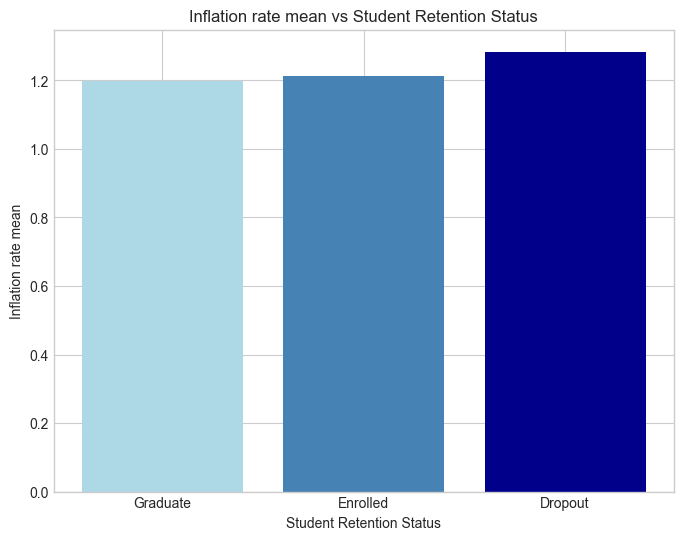

In [62]:
#Inflation rate vs Student Retenton Status

InflationRateGraduate = df[(df['Target'] == 'Graduate')].iloc[:,20].mean()
InflationRateEnrolled = df[(df['Target'] == 'Enrolled')].iloc[:,20].mean()
InflationRateDropout = df[(df['Target'] == 'Dropout')].iloc[:,20].mean()

plt.figure(figsize= (8,6))
plt.title("Inflation rate mean vs Student Retention Status")
plt.xlabel("Student Retention Status")
plt.ylabel("Inflation rate mean")
plt.bar(['Graduate', 'Enrolled', 'Dropout'], [InflationRateGraduate, InflationRateEnrolled, InflationRateDropout], color = ['#ADD8E6', '#4682B4', '#00008B'], alpha= 1)
plt.show()

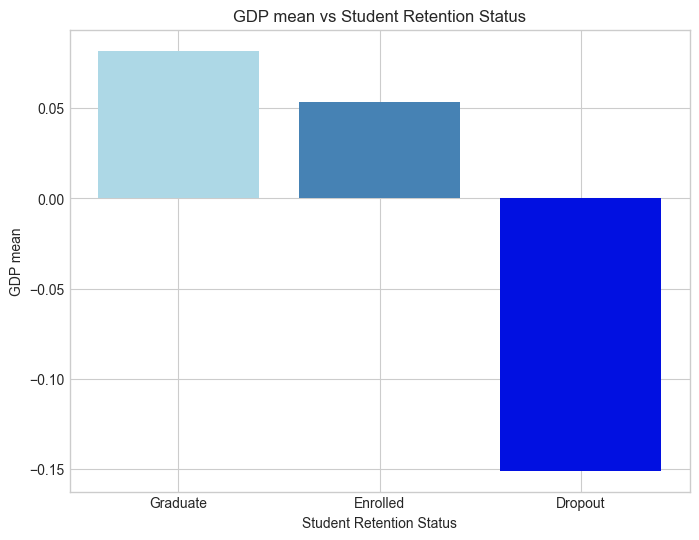

In [63]:
#GDP vs Student Retenton Status

GDPGraduate = df[(df['Target'] == 'Graduate')].iloc[:,21].mean()
GDPEnrolled = df[(df['Target'] == 'Enrolled')].iloc[:,21].mean()
GDPDropout = df[(df['Target'] == 'Dropout')].iloc[:,21].mean()

plt.figure(figsize= (8,6))
plt.title("GDP mean vs Student Retention Status")
plt.xlabel("Student Retention Status")
plt.ylabel("GDP mean")
# sns.violinplot(data=df_GDP, x= "label", y ='value', palette= ['#ADD8E6', '#4682B4', '#0110E1'])
plt.bar(['Graduate', 'Enrolled', 'Dropout'], [GDPGraduate, GDPEnrolled, GDPDropout],  color = ['#ADD8E6', '#4682B4', '#0110E1'])
plt.show()

Data Chosen yang berdasarkan analisis ada corelationnya
GDP
Inflation rate
Unemploymen rate
Age
Gender
Scholarship holder
Tuition Fees Up to date
Debtor
attendance
course
Marital Status

In [64]:
#input the data that has correlation
df = df[['GDP', 'Inflation rate', 'Marital status', 'Daytime/evening attendance', 
        'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Gender', 
        'Age at enrollment', 'Unemployment rate', 'Course', 'Target']].copy()

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GDP                         4424 non-null   float64
 1   Inflation rate              4424 non-null   float64
 2   Marital status              4424 non-null   object 
 3   Daytime/evening attendance  4424 non-null   object 
 4   Debtor                      4424 non-null   object 
 5   Tuition fees up to date     4424 non-null   object 
 6   Scholarship holder          4424 non-null   object 
 7   Gender                      4424 non-null   object 
 8   Age at enrollment           4424 non-null   int64  
 9   Unemployment rate           4424 non-null   float64
 10  Course                      4424 non-null   object 
 11  Target                      4424 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 414.9+ KB


,GDP,Inflation rate,Marital status,Daytime/evening attendance,Debtor,Tuition fees up to date,Scholarship holder,Gender,Age at enrollment,Unemployment rate,Course,Target
0,1.74,1.4,Single,Daytime,No,Yes,No,Male,20,10.8,Animation and Multimedia Design,Dropout
1,0.79,-0.3,Single,Daytime,No,No,No,Male,19,13.9,Tourism,Graduate
2,1.74,1.4,Single,Daytime,No,No,No,Male,19,10.8,Communication Design,Dropout
3,-3.12,-0.8,Single,Daytime,No,Yes,No,Female,20,9.4,Journalism and Communication,Graduate
4,0.79,-0.3,Married,Evening,No,Yes,No,Female,45,13.9,Social Service (evening attendance),Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-4.06,2.8,Single,Daytime,No,Yes,No,Male,19,15.5,Journalism and Communication,Graduate
4420,2.02,0.6,Single,Daytime,Yes,No,No,Female,18,11.1,Journalism and Communication,Dropout
4421,0.79,-0.3,Single,Daytime,No,Yes,Yes,Female,30,13.9,Nursing,Dropout
4422,-3.12,-0.8,Single,Daytime,No,Yes,Yes,Female,20,9.4,Management,Graduate


In [65]:
#Changing the tuition Fees up to date, Scholarship holder, Debtor back to 1 or 0 since its value only yes or no

mapping_YesNo = {
    'No' : 0,
    'Yes' : 1
}

df['Debtor'] = df['Debtor'].replace(mapping_YesNo)
df['Scholarship holder'] = df['Scholarship holder'].replace(mapping_YesNo)
df['Tuition fees up to date'] = df['Tuition fees up to date'].replace(mapping_YesNo)

df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GDP                         4424 non-null   float64
 1   Inflation rate              4424 non-null   float64
 2   Marital status              4424 non-null   object 
 3   Daytime/evening attendance  4424 non-null   object 
 4   Debtor                      4424 non-null   int64  
 5   Tuition fees up to date     4424 non-null   int64  
 6   Scholarship holder          4424 non-null   int64  
 7   Gender                      4424 non-null   object 
 8   Age at enrollment           4424 non-null   int64  
 9   Unemployment rate           4424 non-null   float64
 10  Course                      4424 non-null   object 
 11  Target                      4424 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 414.9+ KB


C:\Users\Xov\AppData\Local\Temp\ipykernel_944\2283759898.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Debtor'] = df['Debtor'].replace(mapping_YesNo)
C:\Users\Xov\AppData\Local\Temp\ipykernel_944\2283759898.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Scholarship holder'] = df['Scholarship holder'].replace(mapping_YesNo)
C:\Users\Xov\AppData\Local\Temp\ipykernel_944\2283759898.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [66]:
#Encode all the object type column 

encoder = OneHotEncoder()
df_encode = encoder.fit_transform(df[['Marital status', 'Daytime/evening attendance', 'Gender', 'Course']])
df_encode = pd.DataFrame(df_encode.toarray())

df_encode

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4422,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#Merge the df_encode to the main df

df_merge = pd.concat([df.reset_index(drop=True), df_encode],axis = 1)
df_merge = df_merge.drop(['Marital status', 'Daytime/evening attendance', 'Gender', 'Course'], axis= 1)
df_merge.columns = df_merge.columns.astype(str)
df_merge

,GDP,Inflation rate,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,Unemployment rate,Target,0,1,...,17,18,19,20,21,22,23,24,25,26
0,1.74,1.4,0,1,0,20,10.8,Dropout,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.79,-0.3,0,0,0,19,13.9,Graduate,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.74,1.4,0,0,0,19,10.8,Dropout,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.12,-0.8,0,1,0,20,9.4,Graduate,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.79,-0.3,0,1,0,45,13.9,Graduate,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-4.06,2.8,0,1,0,19,15.5,Graduate,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,2.02,0.6,1,0,0,18,11.1,Dropout,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,0.79,-0.3,0,1,1,30,13.9,Dropout,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4422,-3.12,-0.8,0,1,1,20,9.4,Graduate,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Modeling

In [68]:
#spliting the data

df_train, df_val = train_test_split(df_merge, test_size= 0.2, random_state=99)

x_train = df_train.drop(['Target'], axis = 1).copy()
y_train = df_train['Target'].copy()
x_val = df_val.drop(['Target'], axis = 1).copy()
y_val = df_val['Target'].copy()

In [69]:
#modeling (default)

randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)
print(randomForest.score(x_train,y_train))
print(randomForest.score(x_val, y_val))

0.8878214184797966
0.6203389830508474


In [70]:
#F1 for default Model

y_val_pred = randomForest.predict(x_val)
val_f1 = f1_score(y_val, y_val_pred, average = 'weighted')

print(val_f1)

0.6070483649461866


In [71]:
#Grid Search/Parameter Tuning

param = {"min_samples_leaf" : [2,3,4,5],
         "min_samples_split" : [2,3,4,5],
         "n_estimators" : [100,150,200]}

randomForest = RandomForestClassifier()
grid_search = GridSearchCV(estimator=randomForest, param_grid= param)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}

In [72]:
#modeling with K fold cross validation
x = df_merge.drop(['Target'], axis = 1).copy()
y = df_merge['Target'].copy()

best_model = grid_search.best_estimator_
score = cross_val_score(best_model, x, y, cv=10, scoring= 'accuracy')
y_pred = cross_val_predict(best_model, x, y, cv=10)
print(score)
print(score.mean())
print(f1_score(y, y_pred, average='weighted'))


[0.6275395  0.63431151 0.6523702  0.65462754 0.66515837 0.62669683
 0.6040724  0.68778281 0.63348416 0.62669683]
0.6412740161179942
0.5964096575740118


In [73]:
#making a confusion table,  F1 Score, and accuracy each target variable

classes = best_model.classes_

results= []

for cls in classes:
    y_binary_true = (y== cls).astype(int)
    y_binary_pred = (y_pred == cls).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_binary_true, y_binary_pred).ravel()

    accuracy = accuracy_score(y_binary_true, y_binary_pred)
    f1 = f1_score(y_binary_true, y_binary_pred)

    results.append({
        'Class': cls,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

metrics_table = pd.DataFrame(results)

print(metrics_table)

avg_accuracy = metrics_table['Accuracy'].mean()
avg_f1_score = metrics_table['F1 Score'].mean()

print("\nAverage Accuracy across all classes:", avg_accuracy)
print("Average F1 Score across all classes:", avg_f1_score)



      Class    TP   FP    TN   FN  Accuracy  F1 Score
0   Dropout   870  502  2501  551  0.761980  0.622986
1  Enrolled    60   92  3538  734  0.813291  0.126850
2  Graduate  1911  989  1226  298  0.709087  0.748092

Average Accuracy across all classes: 0.7614526823387582
Average F1 Score across all classes: 0.4993091779550203


NOTE* : Value untuk modeling dapat berubah ubah setiap kali di run
